___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="300px" height="100px" />


# Proyecto Final

En el proyecto final diseñarás un portafolio de inversión utilizando activos (o ETFs) reales de tu preferencia. Utilizarás todas las herramientas vistas a lo largo del curso para este fin, y después, evaluarás qué tan buena hubiera sido tu inversión de haber invertido en este portafolio.

El proyecto se realizará en equipos de mínimo dos (2) y máximo tres (3) personas. Ni más, ni menos. Para esto, deberán conformar los equipos en este momento, y designar a un miembro del equipo que me envíe un correo con los nombres de los integrantes.
___

## 1. Elección de activos  (10%)

Lo primero es elegir los activos que van a utilizar. 

Escoger 15 acciones de la bolsa de valores de EUA 

En cualquiera de los tres casos deben explicar detalladamente la elección de cada uno de los activos y/o ETFs que elijan.

Todos estos activos tienen que tener:
- Market beta
- R2 del beta
- Hacer bootstrap de R2 y Beta, ¿Cuál es la probabiliad que la beta de X activo sea > 1? Histograma de R2 y beta
- Analisis de la acción, P/E ratio, que clase es, que hace la empresa, cuanto vale la empresa, etc.  


Escoger 15 acciones de la bolsa de valores de EUA 

En cualquiera de los tres casos deben explicar detalladamente la elección de cada uno de los activos y/o ETFs que elijan.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import random

In [2]:
tickers = ['VTI', 'GOOGL', 'MCD', 'COST', 'WMT', 'PG',
     'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 'INTC',
    'MSFT', 'JPM', 'NFLX', 'BA']
start_date='2005-01-01'
end_date='2015-01-01'
St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
returns = St.pct_change().dropna()

[*********************100%%**********************]  16 of 16 completed


- Market beta
- R2 del beta

In [35]:
# Calculemos beta, rendimiento y R2 de cada acción 
betas={}
beta = []
R2 = []
tick = []
for i in tickers:
    # obten el data frame
    flag_df=returns[[i,'VTI']]
    # Regresion
    model=LinearRegression()
    X=flag_df[['VTI']]
    y=flag_df[[i]]
    model.fit(X,y)
    # Beta
    bet=model.coef_[0][0]
    # R2
    predicciones=model.predict(X)
    resultad_r2=r2_score(y_pred=predicciones,y_true=y)
    # juntar todo
    rendimiento=np.mean(flag_df[i])
    betas[i]=[beta,resultad_r2,rendimiento*252]
    # Agregar a lista
    beta.append(bet)
    R2.append(resultad_r2)
    tick.append(i)


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [36]:
tabla = pd.DataFrame()
tabla['Tickers'] = tick
tabla['Betas'] = beta
tabla['R2'] = R2
tabla

,Tickers,Betas,R2
0,VTI,0.500000,1.000000
1,GOOGL,1.014093,0.491762
2,MCD,0.613558,0.393306
3,COST,0.680310,0.382251
4,WMT,0.487881,0.236014
5,PG,0.548199,0.352726
6,DIS,1.053735,0.550225
7,V,0.993043,0.479473
8,AMZN,1.093414,0.364775
9,CSCO,1.006041,0.514280


- Hacer bootstrap de R2 y Beta, ¿Cuál es la probabiliad que la beta de X activo sea > 1? Histograma de R2 y beta

In [5]:
# Doble bootstrap, betas y R2

n = 1500
betas_bootstrap = {ticker: [] for ticker in tickers}
r2_bootstrap = {ticker: [] for ticker in tickers}

for _ in range(n):
    flag_df = returns.sample(len(returns), replace=True)

    for ticker in tickers:
        model = LinearRegression()
        X = flag_df[['VTI']]
        y = flag_df[[ticker]]
        model.fit(X, y)
        beta_bootstrap = model.coef_[0][0]
        betas_bootstrap[ticker].append(beta_bootstrap)

        # Nuevo codigo
        predicciones = model.predict(X)
        bootstrap_r2 = r2_score(y_true=y, y_pred=predicciones)
        r2_bootstrap[ticker].append(bootstrap_r2)

In [38]:
df=pd.DataFrame()
df['acciones']=[i for i in betas]
df['betas']=[betas[i][0] for i in betas]
df['r2']=[betas[i][1]for i in betas]
df['rendimiento']=[betas[i][2]for i in betas]
df['betas_bootstrap'] = [betas_bootstrap[ticker] for ticker in tickers]
df['r2_bootstrap']=[r2_bootstrap[ticker] for ticker in tickers]

In [40]:
betass = pd.DataFrame()
betass['Acciones'] = [i for i in tickers]
betass['betas_bootstrap'] = [betas_bootstrap[ticker] for ticker in tickers]


#### Tabla de probabilidades de bootstrap

In [41]:
todos = pd.DataFrame()
todos["Ticker"] = [i for i in tickers]
todos["Prob Beta > 1"] = [np.mean(np.array(betass.betas_bootstrap[0]) > 1),np.mean(np.array(betass.betas_bootstrap[1]) > 1),np.mean(np.array(betass.betas_bootstrap[2]) > 1),np.mean(np.array(betass.betas_bootstrap[3]) > 1),np.mean(np.array(betass.betas_bootstrap[4]) > 1),np.mean(np.array(betass.betas_bootstrap[5]) > 1),np.mean(np.array(betass.betas_bootstrap[6]) > 1),np.mean(np.array(betass.betas_bootstrap[7]) > 1),np.mean(np.array(betass.betas_bootstrap[8]) > 1),np.mean(np.array(betass.betas_bootstrap[9]) > 1),np.mean(np.array(betass.betas_bootstrap[10]) > 1),np.mean(np.array(betass.betas_bootstrap[11]) > 1),np.mean(np.array(betass.betas_bootstrap[12]) > 1),np.mean(np.array(betass.betas_bootstrap[13]) > 1),np.mean(np.array(betass.betas_bootstrap[14]) > 1),np.mean(np.array(betass.betas_bootstrap[15]) > 1)]

todos

,Ticker,Prob Beta > 1
0,VTI,0.395333
1,GOOGL,0.742667
2,MCD,0.000000
3,COST,0.000000
4,WMT,0.000000
5,PG,0.000000
6,DIS,0.994000
7,V,0.371333
8,AMZN,0.997333
9,CSCO,0.602667


# Alphabet (Google)
### P/E ratio
26.1
### Que clase es
pública
### Que hace la empresa
software, internet, tecnologia, conduccion autonoma, IA
### Cuanto vale la empresa
1.61T

In [46]:
google=pd.DataFrame()
google['betas']=betas_bootstrap['GOOGL']
np.mean(google.betas>1)



0.7426666666666667

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) GOOGL')

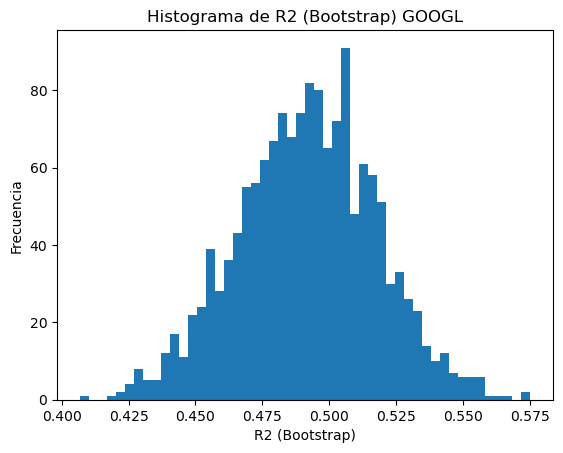

In [47]:
plt.hist(df.r2_bootstrap[1],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) GOOGL')


Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) GOOGL')

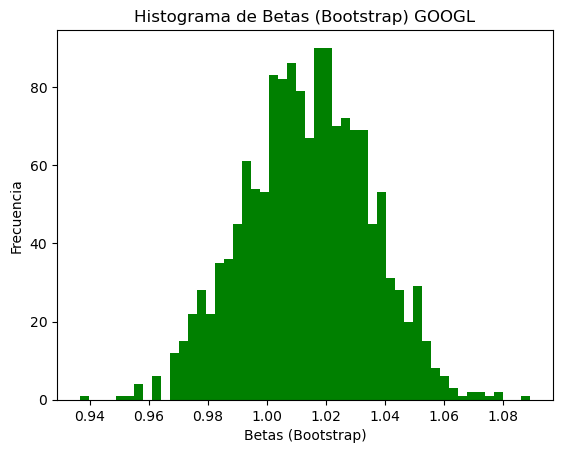

In [48]:
plt.hist(df.betas_bootstrap[1],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) GOOGL')


Text(0, 0.5, 'r2')

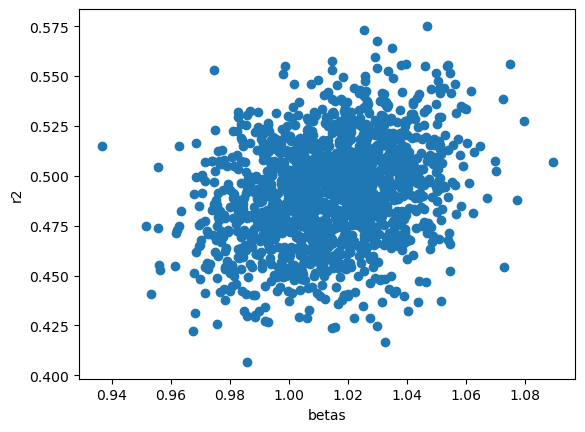

In [49]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[1], df.r2_bootstrap[1])
plt.xlabel("betas")
plt.ylabel("r2")

# McDonald 
### P/E ratio
24.1
### Que clase es
pública
### Que hace la empresa
cadena de restaurantes, comida
### Cuanto vale la empresa
246.27B

In [50]:
# ¿Cuál es la probabiliad que la beta de X activo sea > 1?


mcdonald=pd.DataFrame()
mcdonald['betas']=betas_bootstrap['MCD']
np.mean(mcdonald.betas>1)

0.0

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) MCD')

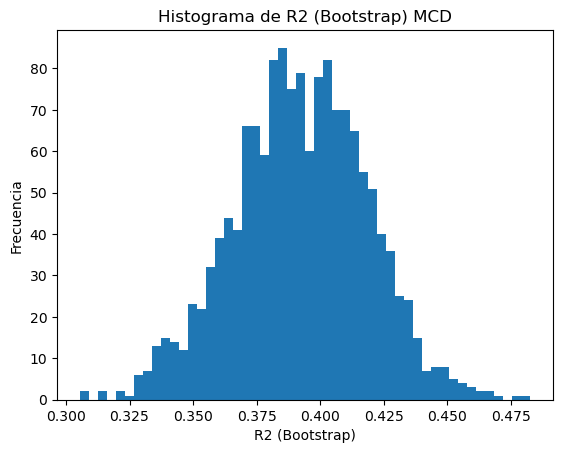

In [51]:
plt.hist(df.r2_bootstrap[2],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) MCD')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) MCD')

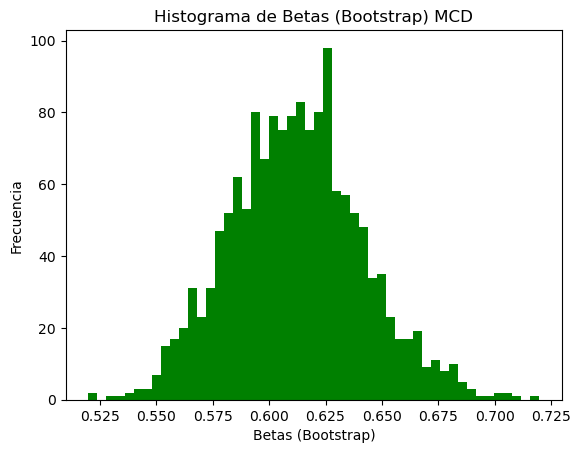

In [52]:
plt.hist(df.betas_bootstrap[2],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) MCD')


Text(0, 0.5, 'r2')

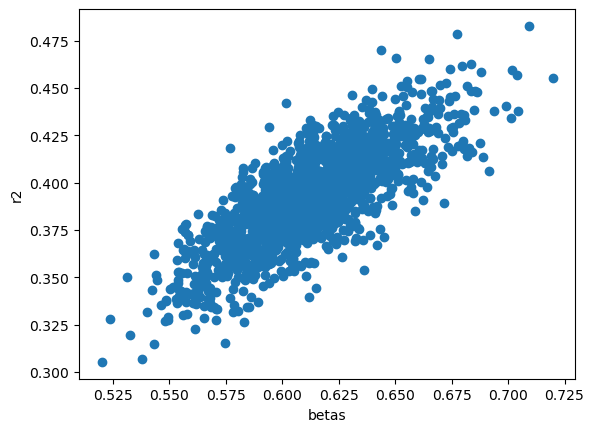

In [53]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[2], df.r2_bootstrap[2])
plt.xlabel("betas")
plt.ylabel("r2")

# Costco
### P/E ratio

### Que clase es
pública
### Que hace la empresa
Venta al por menor,E-commerce
### Cuanto vale la empresa


In [54]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?


cost=pd.DataFrame()
cost['betas']=betas_bootstrap['COST']
np.mean(cost.betas>1)

0.0

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) COST')

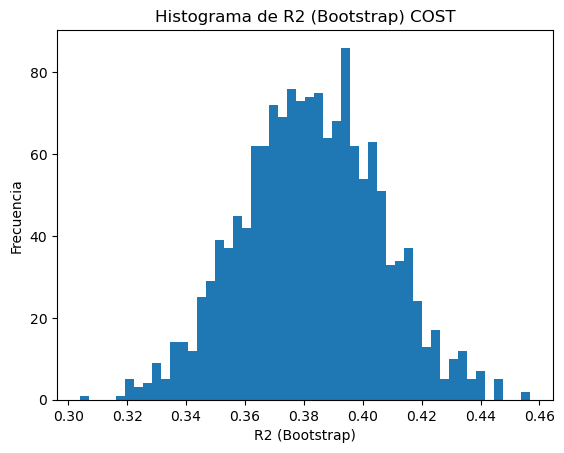

In [55]:
plt.hist(df.r2_bootstrap[3],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) COST')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) COST')

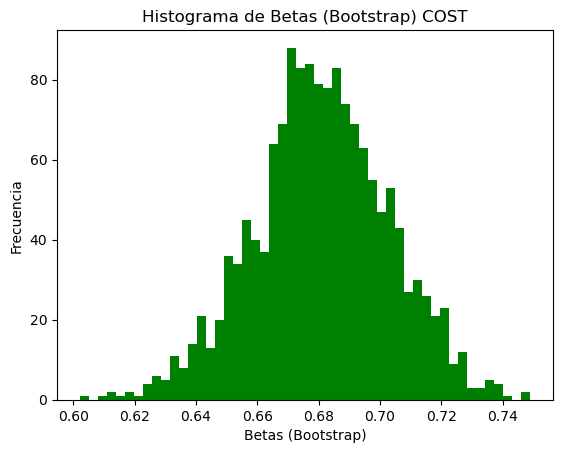

In [56]:
plt.hist(df.betas_bootstrap[3],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) COST')


Text(0, 0.5, 'r2')

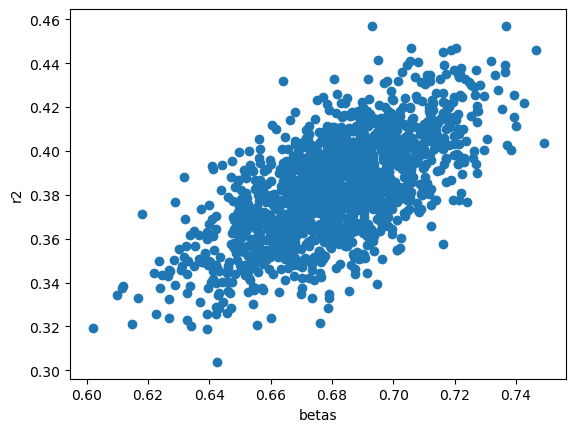

In [57]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[3], df.r2_bootstrap[3])
plt.xlabel("betas")
plt.ylabel("r2")

# Walmart
### P/E ratio
29.8
### Que clase es
pública
### Que hace la empresa
Venta al por menor,E-commerce
### Cuanto vale la empresa
475.72B

In [58]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

wmt=pd.DataFrame()
wmt['betas']=betas_bootstrap['WMT']
np.mean(wmt.betas>1)

0.0

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) WMT')

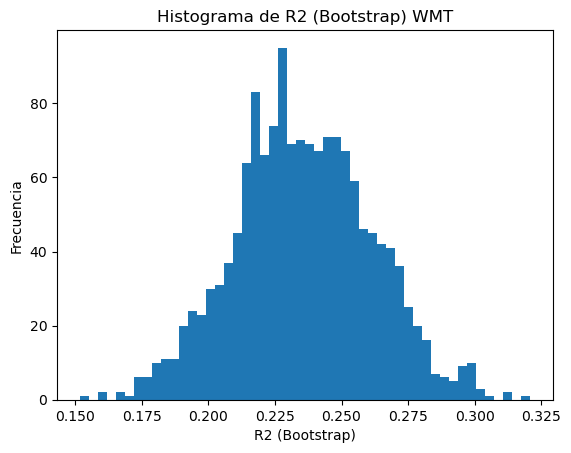

In [61]:
plt.hist(df.r2_bootstrap[4],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) WMT')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) WMT')

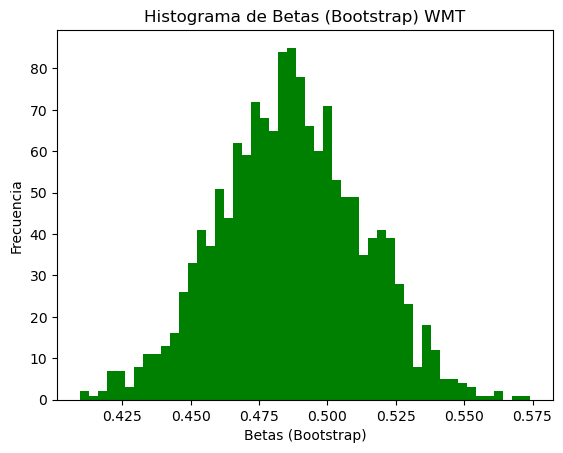

In [62]:
plt.hist(df.betas_bootstrap[4],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) WMT')


Text(0, 0.5, 'r2')

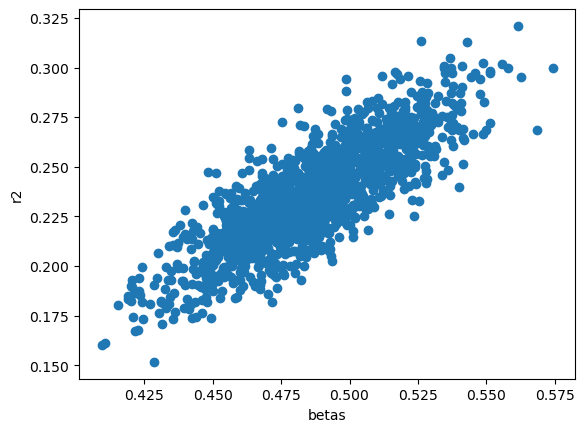

In [63]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[4], df.r2_bootstrap[4])
plt.xlabel("betas")
plt.ylabel("r2")

# Procter & Gamble
### P/E ratio
23.9
### Que clase es
pública
### Que hace la empresa
productos para el hogar y el cuidado personal.
### Cuanto vale la empresa
383.01B


In [64]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

pg=pd.DataFrame()
pg['betas']=betas_bootstrap['PG']
np.mean(pg.betas>1)

0.0

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) PG')

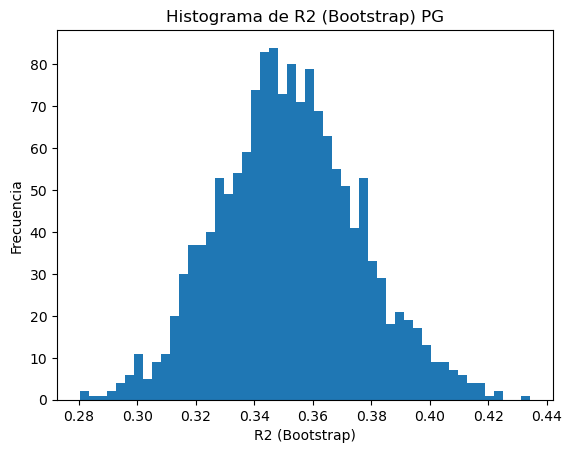

In [65]:
plt.hist(df.r2_bootstrap[5],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) PG')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) PG')

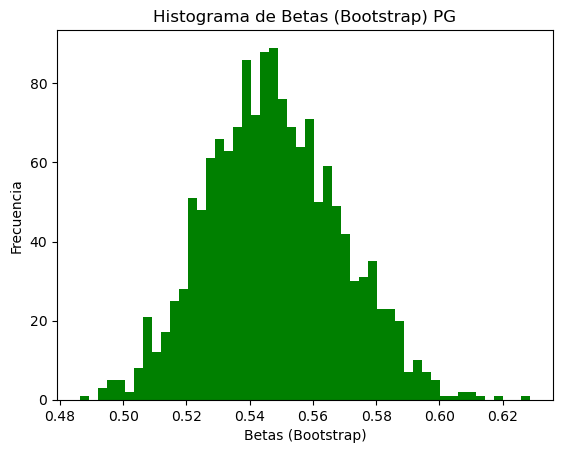

In [66]:
plt.hist(df.betas_bootstrap[5],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) PG')


Text(0, 0.5, 'r2')

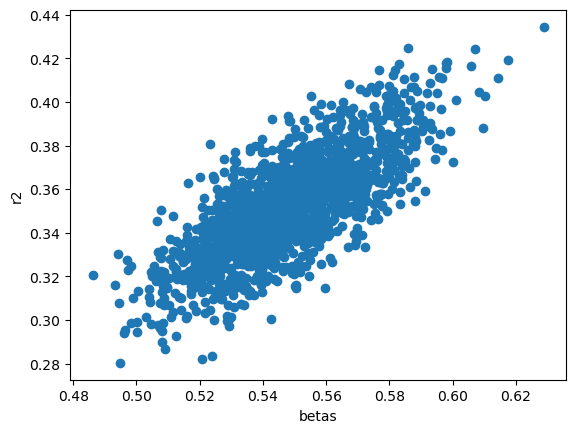

In [68]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[5], df.r2_bootstrap[5])
plt.xlabel("betas")
plt.ylabel("r2")

# Walt Disney
### P/E ratio
75.9
### Que clase es
pública
### Que hace la empresa
Entretenimiento, Parques y resorts, Productos de consumo y licencias,
### Cuanto vale la empresa
199.93B

In [69]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

dis=pd.DataFrame()
dis['betas']=betas_bootstrap['DIS']
np.mean(dis.betas>1)

0.994

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) DIS')

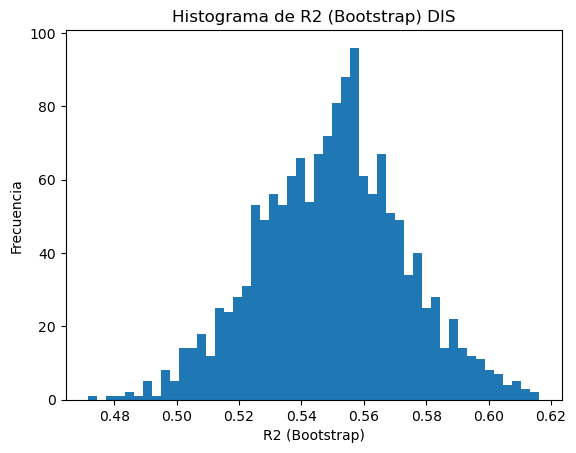

In [70]:
plt.hist(df.r2_bootstrap[6],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) DIS')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) DIS')

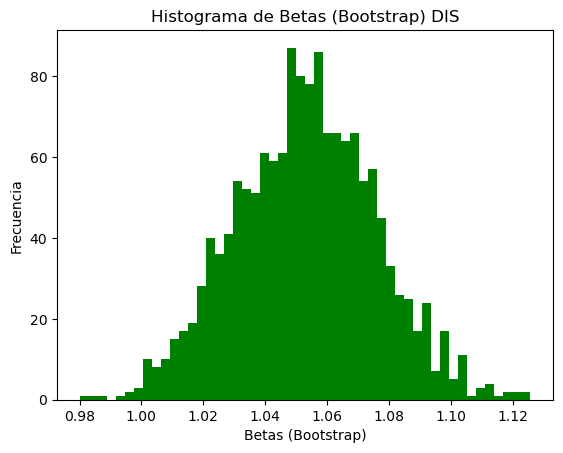

In [71]:
plt.hist(df.betas_bootstrap[6],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) DIS')


Text(0, 0.5, 'r2')

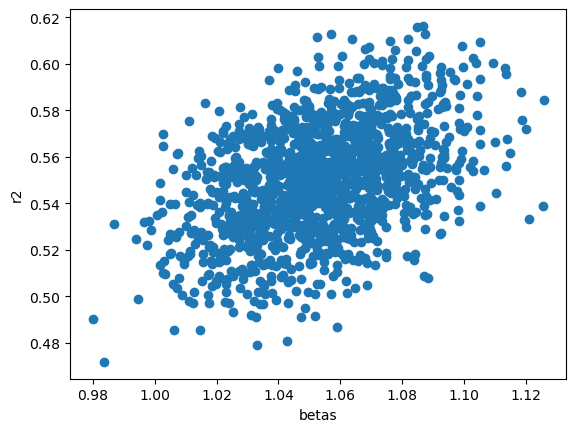

In [72]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[6], df.r2_bootstrap[6])
plt.xlabel("betas")
plt.ylabel("r2")

# Visa 
### P/E ratio
30.1
### Que clase es
pública
### Que hace la empresa
Tarjetas de crédito y débito, Servicios para comerciantes y entidades financieras, Tecnología de pagos
### Cuanto vale la empresa
512.77B

In [73]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

V=pd.DataFrame()
V['betas']=betas_bootstrap['V']
np.mean(V.betas>1)

0.37133333333333335

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) V')

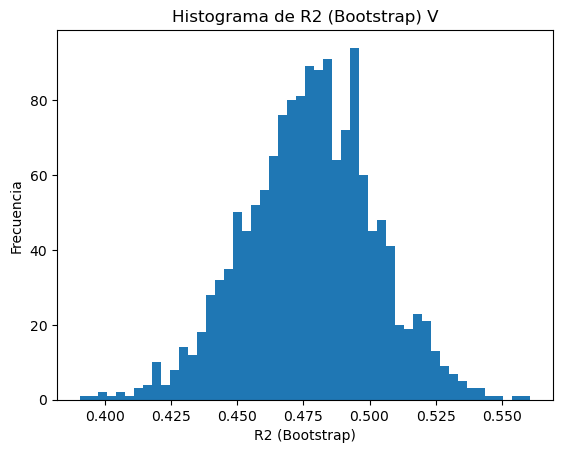

In [74]:
plt.hist(df.r2_bootstrap[7],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) V')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) V')

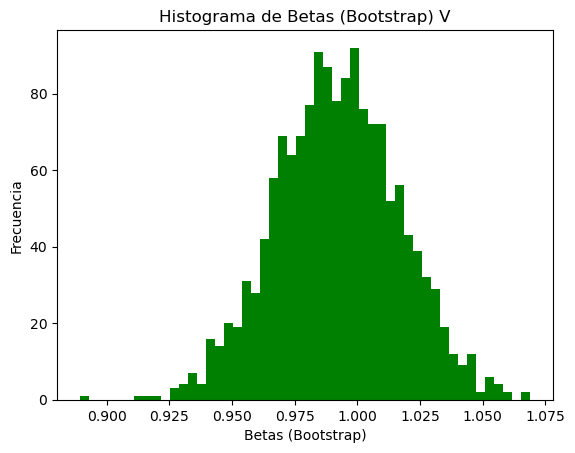

In [75]:
plt.hist(df.betas_bootstrap[7],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) V')


Text(0, 0.5, 'r2')

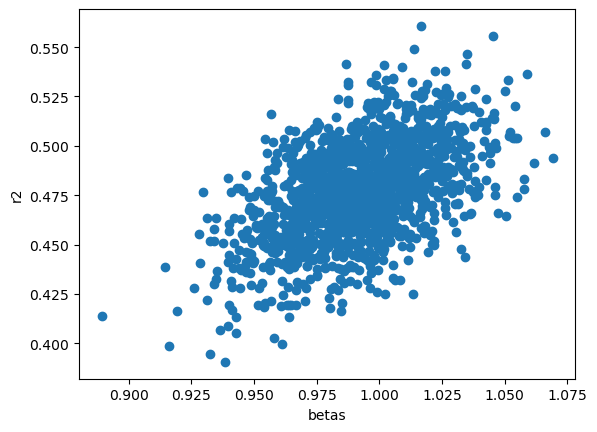

In [76]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[7], df.r2_bootstrap[7])
plt.xlabel("betas")
plt.ylabel("r2")

# Amazon 
### P/E ratio
74.1
### Que clase es
pública
### Que hace la empresa
Comercio electrónico, Medios y entretenimiento, Logística y distribución
### Cuanto vale la empresa
1.57T

In [77]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

AMZN=pd.DataFrame()
AMZN['betas']=betas_bootstrap['AMZN']
np.mean(AMZN.betas>1)

0.9973333333333333

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) AMZN')

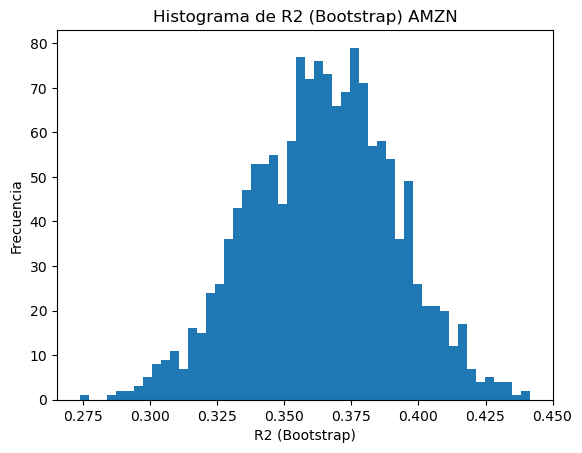

In [78]:
plt.hist(df.r2_bootstrap[8],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) AMZN')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) AMZN')

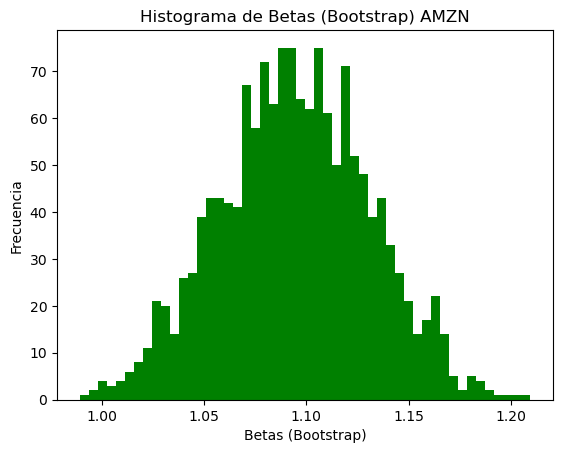

In [79]:
plt.hist(df.betas_bootstrap[8],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) AMZN')


Text(0, 0.5, 'r2')

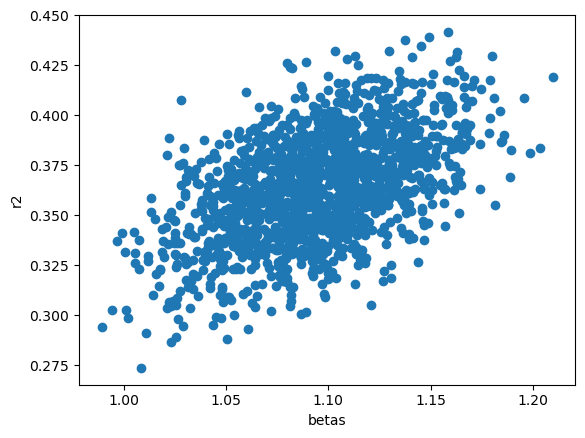

In [81]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[8], df.r2_bootstrap[8])
plt.xlabel("betas")
plt.ylabel("r2")

# Cisco 
### P/E ratio
15.5
### Que clase es
pública
### Que hace la empresa
Redes y Comunicaciones, Hardware y Software
### Cuanto vale la empresa
177.56B

In [82]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

CSCO=pd.DataFrame()
CSCO['betas']=betas_bootstrap['CSCO']
np.mean(CSCO.betas>1)

0.6026666666666667

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) CSCO')

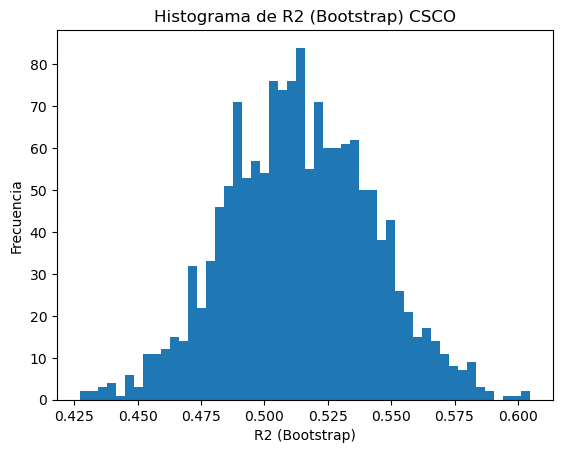

In [83]:
plt.hist(df.r2_bootstrap[9],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) CSCO')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) CSCO')

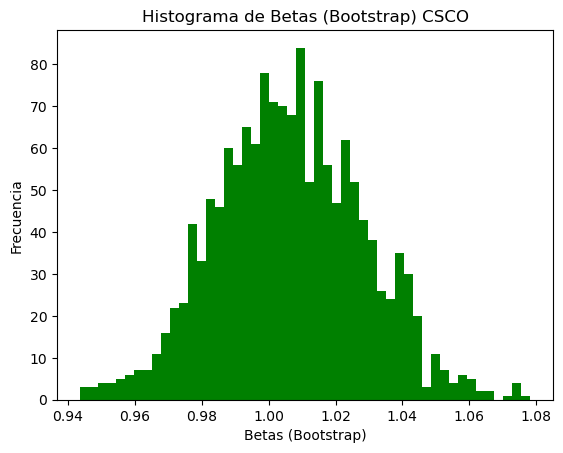

In [84]:
plt.hist(df.betas_bootstrap[9],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) CSCO')


Text(0, 0.5, 'r2')

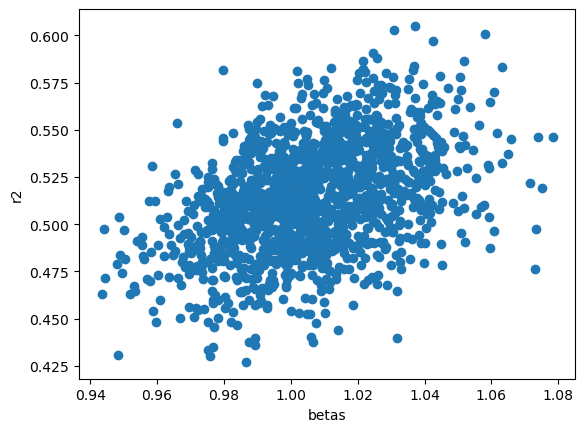

In [85]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[9], df.r2_bootstrap[9])
plt.xlabel("betas")
plt.ylabel("r2")

# Pepsico 
### P/E ratio
27.7
### Que clase es
pública
### Que hace la empresa
Bebidas, Productos alimenticios, Innovación y desarrollo sostenible
### Cuanto vale la empresa
263.76B

In [86]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

PEP=pd.DataFrame()
PEP['betas']=betas_bootstrap['PEP']
np.mean(PEP.betas>1)

0.0

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) PEP')

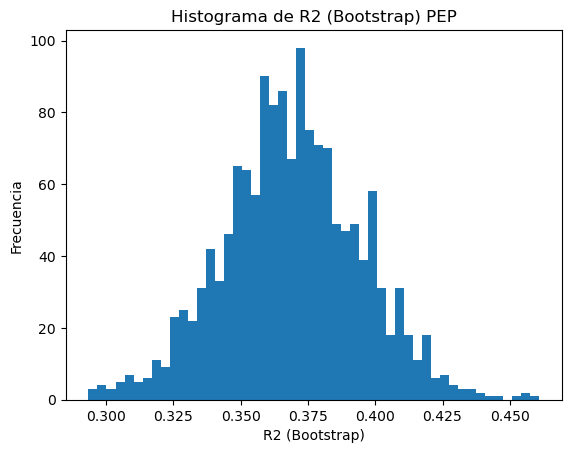

In [87]:
plt.hist(df.r2_bootstrap[10],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) PEP')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) PEP')

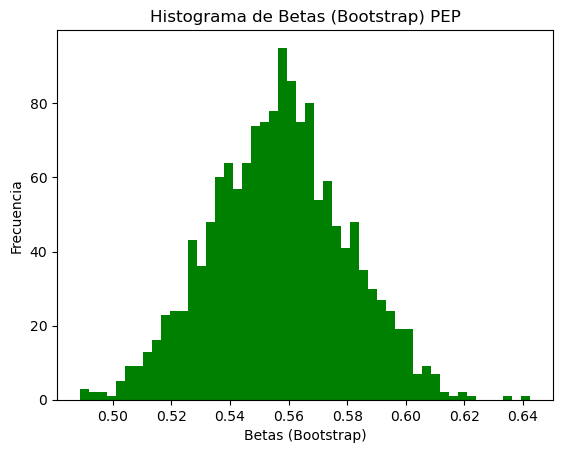

In [88]:
plt.hist(df.betas_bootstrap[10],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) PEP')


Text(0, 0.5, 'r2')

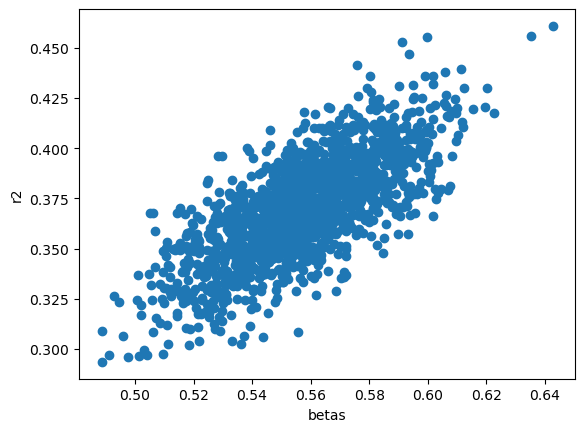

In [89]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[10], df.r2_bootstrap[10])
plt.xlabel("betas")
plt.ylabel("r2")

# Intel 
### P/E ratio
-110
### Que clase es
pública
### Que hace la empresa
Fabricación de chips, Innovación en tecnología, Data Centers y soluciones empresariales
### Cuanto vale la empresa
208.55B

In [90]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

INTC=pd.DataFrame()
INTC['betas']=betas_bootstrap['INTC']
np.mean(INTC.betas>1)

0.996

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) INTC')

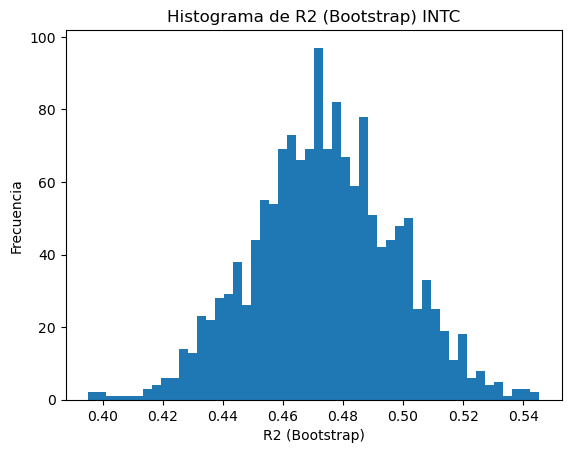

In [91]:
plt.hist(df.r2_bootstrap[11],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) INTC')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) INTC')

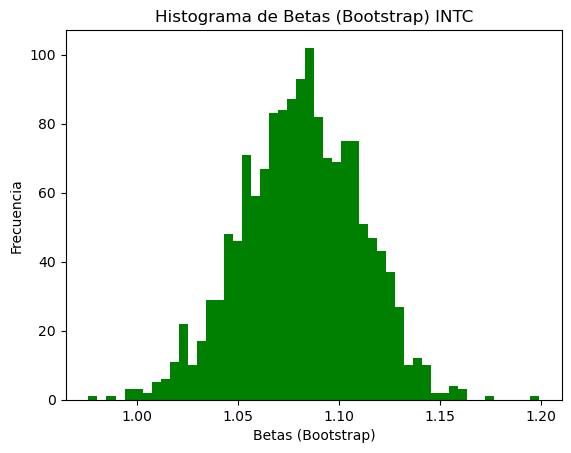

In [92]:
plt.hist(df.betas_bootstrap[11],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) INTC')


Text(0, 0.5, 'r2')

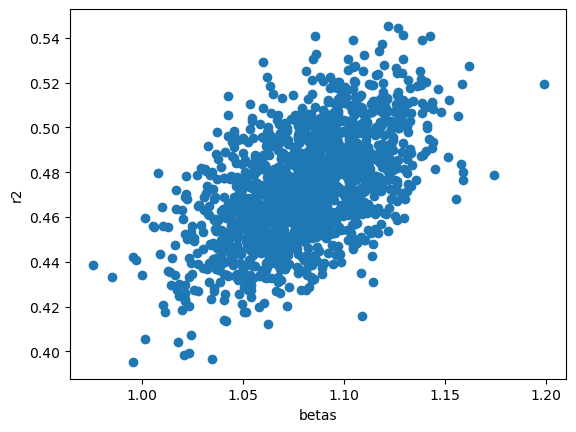

In [93]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[11], df.r2_bootstrap[11])
plt.xlabel("betas")
plt.ylabel("r2")

# Microsoft 
### P/E ratio
35.7
### Que clase es
pública
### Que hace la empresa
Sistemas Operativos y Software, Dispositivos y hardware, Redes Sociales y Productos Empresariales
### Cuanto vale la empresa
2.69T

In [94]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

MSFT=pd.DataFrame()
MSFT['betas']=betas_bootstrap['MSFT']
np.mean(MSFT.betas>1)

0.952

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) MSFT')

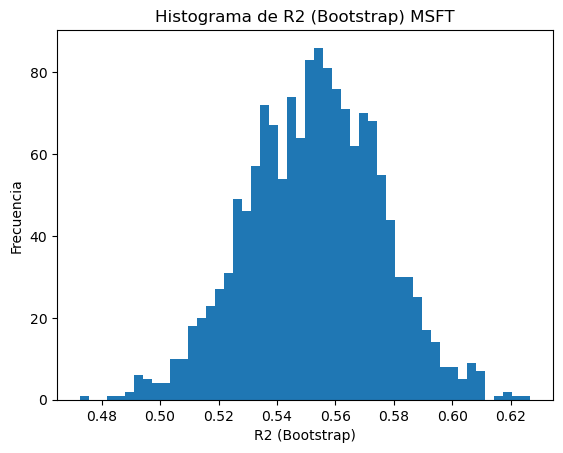

In [95]:
plt.hist(df.r2_bootstrap[12],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) MSFT')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) MSFT')

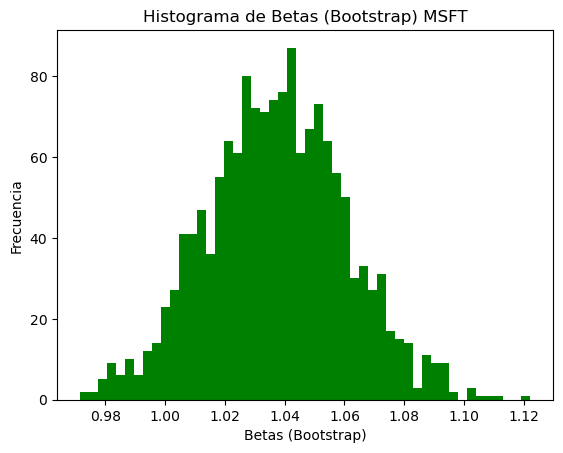

In [96]:
plt.hist(df.betas_bootstrap[12],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) MSFT')


Text(0, 0.5, 'r2')

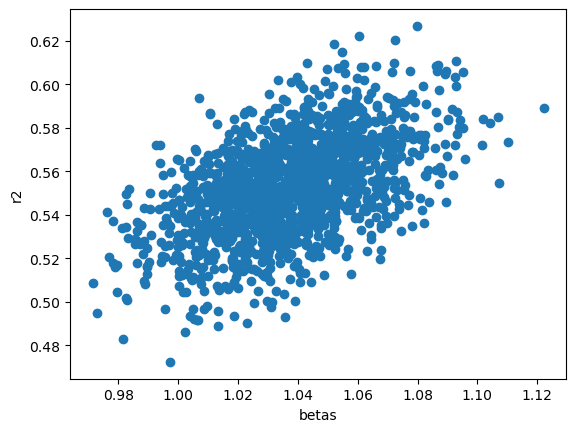

In [98]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[12], df.r2_bootstrap[12])
plt.xlabel("betas")
plt.ylabel("r2")

# JPMorgan Chase 
### P/E ratio
9.11
### Que clase es
pública
### Que hace la empresa
Banca de Inversión y Banca Comercial, Gestión de Activos y Patrimonios, 
### Cuanto vale la empresa
N/A

In [99]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

JPM=pd.DataFrame()
JPM['betas']=betas_bootstrap['JPM']
np.mean(JPM.betas>1)

1.0

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) JPM')

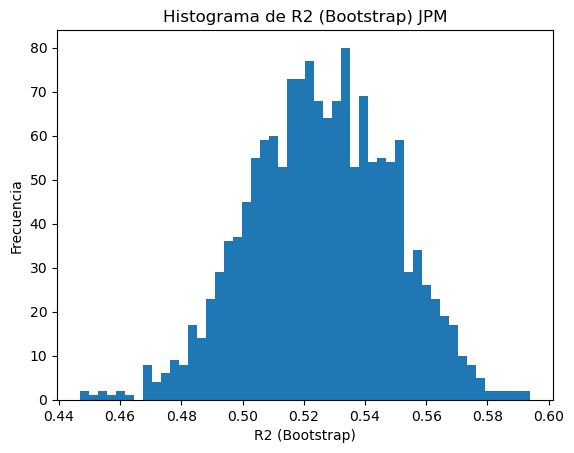

In [100]:
plt.hist(df.r2_bootstrap[13],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) JPM')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) JPM')

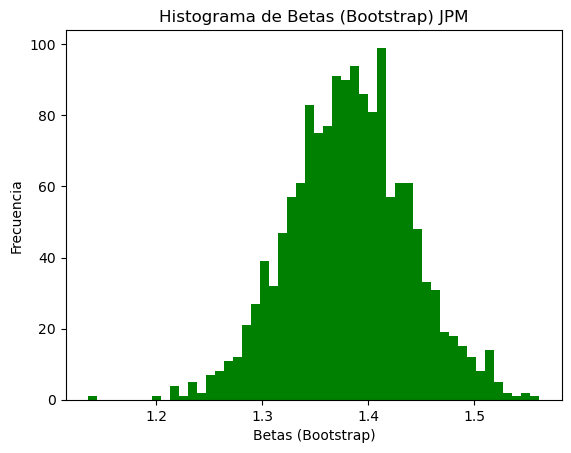

In [101]:
plt.hist(df.betas_bootstrap[13],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) JPM')


Text(0, 0.5, 'r2')

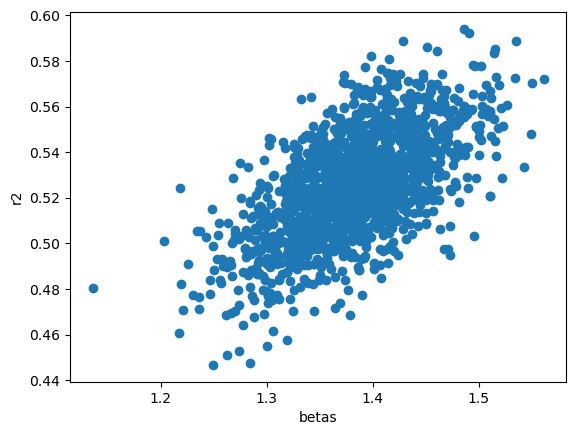

In [102]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[13], df.r2_bootstrap[13])
plt.xlabel("betas")
plt.ylabel("r2")

# Netflix
### P/E ratio
45.7
### Que clase es
pública
### Que hace la empresa
Servicio de Streaming, Producción de Contenido Original
### Cuanto vale la empresa
210.35B

In [103]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

NFLX=pd.DataFrame()
NFLX['betas']=betas_bootstrap['NFLX']
np.mean(NFLX.betas>1)

0.6106666666666667

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) NFLX')

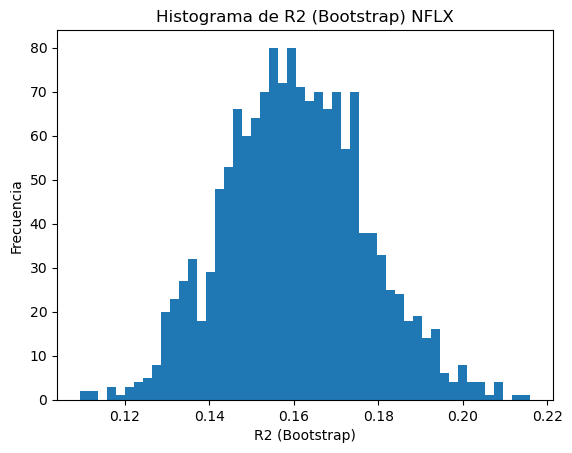

In [104]:
plt.hist(df.r2_bootstrap[14],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) NFLX')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) NFLX')

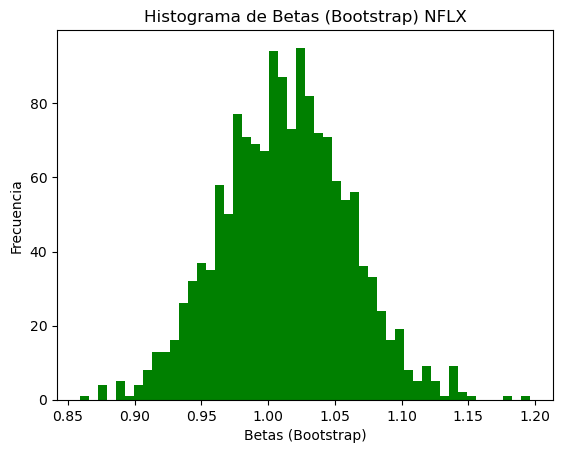

In [105]:
plt.hist(df.betas_bootstrap[14],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) NFLX')


Text(0, 0.5, 'r2')

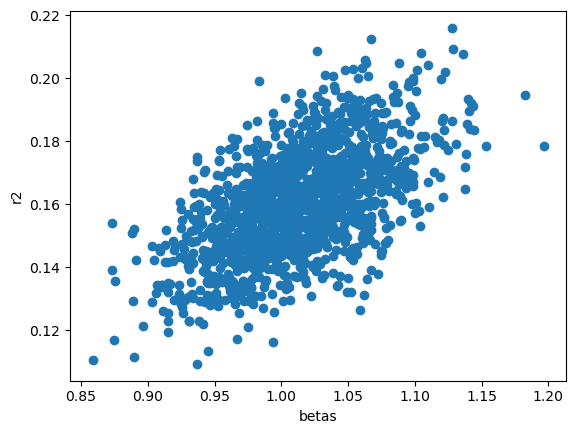

In [106]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[14], df.r2_bootstrap[14])
plt.xlabel("betas")
plt.ylabel("r2")

# The Boeing Company
### P/E ratio
-46.3
### Que clase es
pública
### Que hace la empresa
Aeronaves comerciales, Aeroespacial y Defensa, Espacio y Exploración
### Cuanto vale la empresa
164.76B


In [107]:
# ¿Cuál es la probabiliad que la beta del activo sea > 1?

BA=pd.DataFrame()
BA['betas']=betas_bootstrap['BA']
np.mean(BA.betas>1)

1.0

Text(0.5, 1.0, 'Histograma de R2 (Bootstrap) BA')

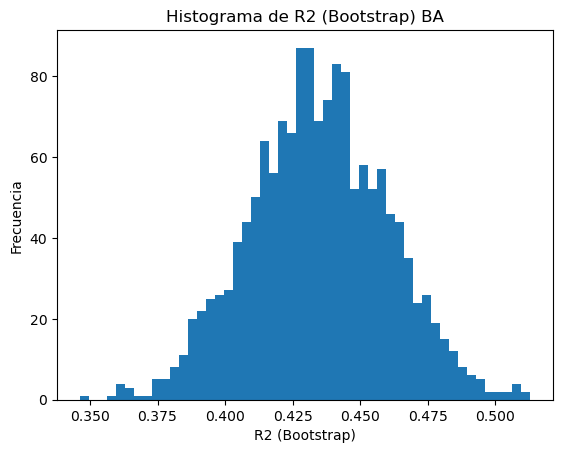

In [108]:
plt.hist(df.r2_bootstrap[15],bins=50)
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) BA')

Text(0.5, 1.0, 'Histograma de Betas (Bootstrap) BA')

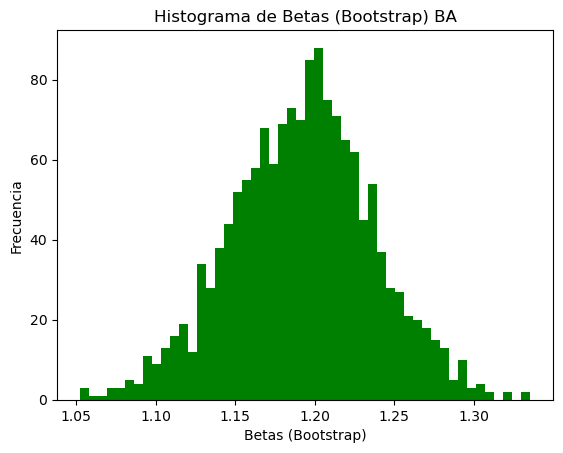

In [109]:
plt.hist(df.betas_bootstrap[15],bins=50,color='green')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) BA')


Text(0, 0.5, 'r2')

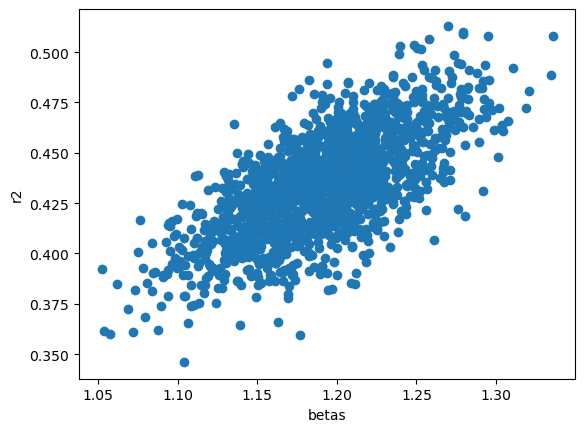

In [110]:
# Relación entre R2 y beta
plt.scatter(df.betas_bootstrap[15], df.r2_bootstrap[15])
plt.xlabel("betas")
plt.ylabel("r2")

## 2. Selección de portafolios

Una vez elegidos los activos y/o ETFs:

1. Usando los precios históricos de dichos activos hasta el 2015-12-31 (la fecha inicial es un parámetro que ustedes deberán elegir), diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2016. Para esto, deberán suponer un coeficiente de aversión al riesgo.

2. Usando los precios históricos de dichos activos hasta el 2016-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2017.

3. Usando los precios históricos de dichos activos hasta el 2017-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2018.

4. Usando los precios históricos de dichos activos hasta el 2018-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2019.

5. Usando los precios históricos de dichos activos hasta el 2019-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2020.

6. Usando los precios históricos de dichos activos hasta el 2020-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2021.

7. Usando los precios históricos de dichos activos hasta el 2021-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2022.

8. Usando los precios históricos de dichos activos hasta el 2022-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2023.

# 2016

In [265]:
# portafolio para invertir 2016

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2005-01-01'
end_date='2015-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.002

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2016=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2016=df_max_sharpe2016.sharpe.values[0]

# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2016=rf+sharpe_maximo2016*volatility_portafolios

df_max_sharpe2016

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,0.21922,0.210948,0.073943,0.136477,0.056938,0.054984,0.024305,0.078897,0.008124,0.004301,0.016391,0.011692,0.16856,0.122264,0.135535,0.004999,0.102589,1.039142


In [157]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2016.expected_value.values[0]
s_emv=df_max_sharpe2016.volatility.values[0]

cuanto_va_en_cada_una2016=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2016['cuanto_cetes']=1-cuanto_va_en_cada_una2016['cuanto_acciones']
cuanto_va_en_cada_una2016

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,3.365722,-2.365722
1,2.0,1.682861,-0.682861
2,3.0,1.121907,-0.121907
3,4.0,0.841430,0.158570
4,5.0,0.673144,0.326856
5,6.0,0.560954,0.439046
6,7.0,0.480817,0.519183
7,8.0,0.420715,0.579285
8,9.0,0.373969,0.626031
9,10.0,0.336572,0.663428


Multiplicamos los pesos de cada activo por el porcentaje que vamos a invertir en acciones para ver del 100% del portafolio cuanto va en cada activo.

Despues agregamos una columna de cetes para ver cuanto vamos a invertir en cetes.

Vamos a usar como coeficiente de aversión al riesgo 4. Excepto en el 2022, usaremos aversion del riesgo 5.

## NOTA
usamos los treasury de USA como tasa fija, en el codigo dice cetes, pero usaremos la tasa de USA y los datos historicos de la FED.


In [177]:
pesos_2016 = df_max_sharpe2016*cuanto_va_en_cada_una2016.cuanto_acciones[4]


pesos_2016 = pesos_2016.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2016['BONDS'] = cuanto_va_en_cada_una2016.cuanto_cetes[4]
pesos_2016

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.007325,0.045656,0.041805,0.126073,0.008639,0.040763,0.091327,0.030767,0.119372,0.084249,0.011389,0.044259,0.006589,0.010323,0.004607,0.326856


Sumamos la fila para asegurar que la sumatoria es 1

In [163]:
fila_a_sumar = pesos_netos.iloc[0]

# Calcular la suma de la fila
suma_fila = fila_a_sumar.sum()
suma_fila

1.0

# 2017

In [328]:
# portafolio para invertir 2017

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2006-01-01'
end_date='2016-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.0055

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2017=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2017=df_max_sharpe2017.sharpe.values[0]

# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2017=rf+sharpe_maximo2017*volatility_portafolios

df_max_sharpe2017

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,0.160402,0.187951,0.079697,0.014128,0.221081,0.028067,0.030183,0.048043,0.012261,0.086835,0.025375,0.014801,0.011567,0.074885,0.172033,0.074735,0.10631,0.824163


In [329]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2017.expected_value.values[0]
s_emv=df_max_sharpe2017.volatility.values[0]

cuanto_va_en_cada_una2017=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2017['cuanto_cetes']=1-cuanto_va_en_cada_una2017['cuanto_acciones']
cuanto_va_en_cada_una2017

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,4.384991,-3.384991
1,2.0,2.192495,-1.192495
2,3.0,1.461664,-0.461664
3,4.0,1.096248,-0.096248
4,5.0,0.876998,0.123002
5,6.0,0.730832,0.269168
6,7.0,0.626427,0.373573
7,8.0,0.548124,0.451876
8,9.0,0.487221,0.512779
9,10.0,0.438499,0.561501


In [330]:
pesos_2017 = df_max_sharpe2017*cuanto_va_en_cada_una2017.cuanto_acciones[4]


pesos_2017 = pesos_2017.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2017['BONDS'] = cuanto_va_en_cada_una2017.cuanto_cetes[4]
pesos_2017

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.069894,0.01239,0.193888,0.024615,0.02647,0.042134,0.010753,0.076154,0.022254,0.01298,0.010144,0.065674,0.150872,0.065543,0.093234,0.123002


# 2018

In [331]:
# portafolio para invertir 2018

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2007-01-01'
end_date='2017-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.0133

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2018=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2018=df_max_sharpe2018.sharpe.values[0]

# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2018=rf+sharpe_maximo2018*volatility_portafolios

df_max_sharpe2018

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,0.21472,0.198058,0.118383,0.165494,0.014483,0.039127,0.03965,0.099184,0.012658,0.014117,0.020802,0.062149,0.058704,0.221409,0.020329,0.111886,0.001625,1.016977


In [332]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2018.expected_value.values[0]
s_emv=df_max_sharpe2018.volatility.values[0]

cuanto_va_en_cada_una2018=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2018['cuanto_cetes']=1-cuanto_va_en_cada_una2018['cuanto_acciones']
cuanto_va_en_cada_una2018

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,5.134744,-4.134744
1,2.0,2.567372,-1.567372
2,3.0,1.711581,-0.711581
3,4.0,1.283686,-0.283686
4,5.0,1.026949,-0.026949
5,6.0,0.855791,0.144209
6,7.0,0.733535,0.266465
7,8.0,0.641843,0.358157
8,9.0,0.570527,0.429473
9,10.0,0.513474,0.486526


In [333]:
pesos_2018 = df_max_sharpe2018*cuanto_va_en_cada_una2018.cuanto_acciones[4]


pesos_2018 = pesos_2018.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2018['BONDS'] = cuanto_va_en_cada_una2018.cuanto_cetes[4]
pesos_2018

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.121573,0.169954,0.014873,0.040181,0.040718,0.101857,0.012999,0.014497,0.021363,0.063824,0.060286,0.227375,0.020877,0.114902,0.001669,-0.026949


# 2019

In [334]:
# portafolio para invertir 2019

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2008-01-01'
end_date='2018-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.024

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2019=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2019=df_max_sharpe2019.sharpe.values[0]

# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2019=rf+sharpe_maximo2019*volatility_portafolios

df_max_sharpe2019

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,0.166196,0.195098,0.004975,0.04494,0.054856,0.004439,0.02809,0.146522,0.110287,0.131557,0.131073,0.023093,0.00478,0.008411,0.175404,0.119122,0.012453,0.728845


In [335]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2019.expected_value.values[0]
s_emv=df_max_sharpe2019.volatility.values[0]

cuanto_va_en_cada_una2019=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2019['cuanto_cetes']=1-cuanto_va_en_cada_una2019['cuanto_acciones']
cuanto_va_en_cada_una2019

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,3.735794,-2.735794
1,2.0,1.867897,-0.867897
2,3.0,1.245265,-0.245265
3,4.0,0.933948,0.066052
4,5.0,0.747159,0.252841
5,6.0,0.622632,0.377368
6,7.0,0.533685,0.466315
7,8.0,0.466974,0.533026
8,9.0,0.415088,0.584912
9,10.0,0.373579,0.626421


In [336]:
pesos_2019 = df_max_sharpe2019*cuanto_va_en_cada_una2019.cuanto_acciones[4]


pesos_2019 = pesos_2019.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2019['BONDS'] = cuanto_va_en_cada_una2019.cuanto_cetes[4]
pesos_2019

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.003717,0.033577,0.040986,0.003316,0.020988,0.109475,0.082402,0.098294,0.097932,0.017254,0.003572,0.006285,0.131055,0.089003,0.009304,0.252841


# 2020

In [337]:
# portafolio para invertir 2020

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2009-01-01'
end_date='2019-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.0155

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2020=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2020=df_max_sharpe2020.sharpe.values[0]

# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2020=rf+sharpe_maximo2020*volatility_portafolios

df_max_sharpe2020

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,0.211654,0.172643,0.024282,0.013096,0.071151,0.08521,0.026106,0.029942,0.000755,0.21386,0.092553,0.121448,0.046803,0.07132,0.089879,0.09348,0.020114,1.136183


In [338]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2020.expected_value.values[0]
s_emv=df_max_sharpe2020.volatility.values[0]

cuanto_va_en_cada_una2020=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2020['cuanto_cetes']=1-cuanto_va_en_cada_una2020['cuanto_acciones']
cuanto_va_en_cada_una2020

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,6.581102,-5.581102
1,2.0,3.290551,-2.290551
2,3.0,2.193701,-1.193701
3,4.0,1.645275,-0.645275
4,5.0,1.316220,-0.316220
5,6.0,1.096850,-0.096850
6,7.0,0.940157,0.059843
7,8.0,0.822638,0.177362
8,9.0,0.731234,0.268766
9,10.0,0.658110,0.341890


In [339]:
pesos_2020 = df_max_sharpe2020*cuanto_va_en_cada_una2020.cuanto_acciones[4]


pesos_2020 = pesos_2020.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2020['BONDS'] = cuanto_va_en_cada_una2020.cuanto_cetes[4]
pesos_2020

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.03196,0.017237,0.09365,0.112156,0.034361,0.039411,0.000994,0.281487,0.121821,0.159852,0.061603,0.093873,0.1183,0.12304,0.026474,-0.31622


# 2021

In [340]:
# portafolio para invertir 2021

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2010-01-01'
end_date='2020-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.0009

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2021=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2021=df_max_sharpe2021.sharpe.values[0]

# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2021=rf+sharpe_maximo2021*volatility_portafolios

df_max_sharpe2021

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,0.211049,0.178761,0.10882,0.022228,0.257924,0.075743,0.038543,0.020378,0.043534,0.157471,0.029825,0.149737,0.022803,0.014301,0.031992,0.00744,0.01926,1.175583


In [341]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2021.expected_value.values[0]
s_emv=df_max_sharpe2021.volatility.values[0]

cuanto_va_en_cada_una2021=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2021['cuanto_cetes']=1-cuanto_va_en_cada_una2021['cuanto_acciones']
cuanto_va_en_cada_una2021

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,6.576277,-5.576277
1,2.0,3.288139,-2.288139
2,3.0,2.192092,-1.192092
3,4.0,1.644069,-0.644069
4,5.0,1.315255,-0.315255
5,6.0,1.096046,-0.096046
6,7.0,0.939468,0.060532
7,8.0,0.822035,0.177965
8,9.0,0.730697,0.269303
9,10.0,0.657628,0.342372


In [342]:
pesos_2021 = df_max_sharpe2021*cuanto_va_en_cada_una2021.cuanto_acciones[4]


pesos_2021 = pesos_2021.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2021['BONDS'] = cuanto_va_en_cada_una2021.cuanto_cetes[4]
pesos_2021

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.143126,0.029236,0.339235,0.099621,0.050694,0.026802,0.057258,0.207115,0.039227,0.196943,0.029992,0.01881,0.042077,0.009786,0.025332,-0.315255


# 2022

In [343]:
# portafolio para invertir 2022

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2011-01-01'
end_date='2021-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.0007

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2022=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2022=df_max_sharpe2022.sharpe.values[0]


# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2022=rf+sharpe_maximo2022*volatility_portafolios

df_max_sharpe2022

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,0.243751,0.189682,0.042067,0.057249,0.09291,0.016455,0.071304,0.003673,0.030312,0.005321,0.074326,0.014957,0.196801,0.120927,0.014082,0.204871,0.054746,1.281364


In [344]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2022.expected_value.values[0]
s_emv=df_max_sharpe2022.volatility.values[0]

cuanto_va_en_cada_una2022=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2022['cuanto_cetes']=1-cuanto_va_en_cada_una2022['cuanto_acciones']
cuanto_va_en_cada_una2022

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,6.755335,-5.755335
1,2.0,3.377668,-2.377668
2,3.0,2.251778,-1.251778
3,4.0,1.688834,-0.688834
4,5.0,1.351067,-0.351067
5,6.0,1.125889,-0.125889
6,7.0,0.965048,0.034952
7,8.0,0.844417,0.155583
8,9.0,0.750593,0.249407
9,10.0,0.675534,0.324466


In [345]:
pesos_2022 = df_max_sharpe2022*cuanto_va_en_cada_una2022.cuanto_acciones[5]


pesos_2022 = pesos_2022.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2022['BONDS'] = cuanto_va_en_cada_una2022.cuanto_cetes[5]
pesos_2022

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.047362,0.064456,0.104606,0.018527,0.08028,0.004135,0.034128,0.005991,0.083683,0.016839,0.221576,0.13615,0.015855,0.230662,0.061638,-0.125889


# 2023

In [346]:
# portafolio para invertir 2023

# Descargar acciones
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
            'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC','MSFT', 'JPM', 'NFLX', 'BA']
start_date='2022-01-01'
end_date='2022-12-31'
st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
rt = st.pct_change().dropna()


resumen=pd.DataFrame()
resumen['expected_value']=rt.mean()*252
resumen['volatility']=rt.std()*np.sqrt(252)

rt.cov()
sigma=rt.cov()

rf=0.0433

n_port=10000
n_act=len(rt.keys())

w = np.random.dirichlet((1,) * n_act, size=1)

valores_esperados_markowitz=w.dot(rt.mean())*252

volatilitys_markowitz=[]
for i in w:
    variance=i.dot(sigma).dot(i.T)
    volatility=np.sqrt(variance)*np.sqrt(252)
    volatilitys_markowitz.append(volatility)

df=pd.DataFrame({
    'expected_value':valores_esperados_markowitz,
    'volatility':volatilitys_markowitz
})

df['GOOGL']=[i[0]for i in w]
df['MCD']=[i[1]for i in w]
df['COST']=[i[2]for i in w]
df['WMT']=[i[3]for i in w]
df['PG']=[i[4]for i in w]
df['DIS']=[i[5]for i in w]
df['V']=[i[6]for i in w]
df['AMZN']=[i[7]for i in w]
df['CSCO']=[i[8]for i in w]
df['PEP']=[i[9]for i in w]
df['INTC']=[i[10]for i in w]
df['MSFT']=[i[11]for i in w]
df['JPM']=[i[12]for i in w]
df['NFLX']=[i[13]for i in w]
df['BA']=[i[14]for i in w]

df['sharpe']=(df.expected_value-rf)/df.volatility
df_max_sharpe2023=df[df.sharpe==df.sharpe.max()]
sharpe_maximo2023=df_max_sharpe2023.sharpe.values[0]

# Obten la LAC
volatility_portafolios=np.linspace(0,0.5,100)
lac2023=rf+sharpe_maximo2023*volatility_portafolios

df_max_sharpe2023

[*********************100%%**********************]  15 of 15 completed


,expected_value,volatility,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,sharpe
0,-0.21011,0.256666,0.006743,0.012755,0.200428,0.051542,0.159561,0.000665,0.011528,0.122801,0.011915,0.016503,0.134615,0.070817,0.107559,0.037302,0.055269,-0.987316


In [347]:
# ¿Cuanto invertir en acciones y en cetes?

aversion=np.linspace(1,10,10)

e_emv=df_max_sharpe2023.expected_value.values[0]
s_emv=df_max_sharpe2023.volatility.values[0]

cuanto_va_en_cada_una2023=pd.DataFrame({
    'aversion':aversion,
    'cuanto_acciones':(e_emv-rf)/(s_emv**2*aversion)
})
cuanto_va_en_cada_una2023['cuanto_cetes']=1-cuanto_va_en_cada_una2023['cuanto_acciones']
cuanto_va_en_cada_una2023

,aversion,cuanto_acciones,cuanto_cetes
0,1.0,-3.846697,4.846697
1,2.0,-1.923349,2.923349
2,3.0,-1.282232,2.282232
3,4.0,-0.961674,1.961674
4,5.0,-0.769339,1.769339
5,6.0,-0.641116,1.641116
6,7.0,-0.549528,1.549528
7,8.0,-0.480837,1.480837
8,9.0,-0.427411,1.427411
9,10.0,-0.384670,1.384670


In [348]:
pesos_2023 = df_max_sharpe2023*cuanto_va_en_cada_una2023.cuanto_acciones[3]


pesos_2023 = pesos_2023.drop(['expected_value','volatility','sharpe'], axis=1)
pesos_2023['BONDS'] = cuanto_va_en_cada_una2023.cuanto_cetes[3]
pesos_2023

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,-0.006484,-0.012266,-0.192746,-0.049566,-0.153445,-0.00064,-0.011086,-0.118094,-0.011458,-0.01587,-0.129456,-0.068103,-0.103437,-0.035872,-0.053151,1.961674


## 3. Evaluación del rendimiento (40%)

Usando los portafolios que encontraron en el punto anterior, deberán encontrar:

1. El rendimiento del portafolio 1 durante el 2016.

2. El rendimiento del portafolio 2 durante el 2017.

3. El rendimiento del portafolio 3 durante el 2018.

4. El rendimiento del portafolio 4 durante el 2019.

5. El rendimiento del portafolio 5 durante el 2020.

6. El rendimiento del portafolio 6 durante el 2021.

7. El rendimiento del portafolio 7 durante el 2022.

8. El rendimiento del portafolio 8 durante el 2023.

9. El rendimiento total durante  el periodo de tenencia.

10. El rendimiento promedio anual durante el periodo de tenencia.

11. Si hubieran invertido 10.000 USD en estos portafolios a lo largo del tiempo y nunca hubieran retirado ni adicionado nada más, ¿Cuánto dinero tendrían invertido en este momento?

Para los siguientes calculos vamos a cobrar 0.25% de comisión cada vez que se compre activos, sin embargo se restaran de la utilidad en el momento que se vendan los activos. vamos a suponer que invertimos un capital inicial de $10,000 USD y que se paga 10% de impuestos sobre la utilidad, cada año. 

In [349]:
cap0 = 10000
comision = 0.25/100
tax = 0.1

## El rendimiento del portafolio 1 durante el 2016.

In [350]:
pesos_2016

,GOOGL,MCD,COST,WMT,PG,DIS,V,AMZN,CSCO,PEP,INTC,MSFT,JPM,NFLX,BA,BONDS
0,0.007325,0.045656,0.041805,0.126073,0.008639,0.040763,0.091327,0.030767,0.119372,0.084249,0.011389,0.044259,0.006589,0.010323,0.004607,0.326856


In [351]:


tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2016-01-01'
end_date = '2017-01-01'

RF = 0.002

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2016 = pd.DataFrame()
rend_2016['ticker'] = tick
rend_2016['rend'] = rend


[*********************100%%**********************]  15 of 15 completed


In [352]:
rend_2016

,ticker,rend
0,GOOGL,0.043466
1,MCD,0.067119
2,COST,0.015097
3,WMT,0.157292
4,PG,0.108116
5,DIS,0.027249
6,V,0.038486
7,AMZN,0.177208
8,CSCO,0.174878
9,PEP,0.090511


In [353]:
rt_2016 = np.array(pesos_2016.GOOGL)*rend_2016.rend[0] + np.array(pesos_2016.MCD)*rend_2016.rend[1] + np.array(pesos_2016.COST)*rend_2016.rend[2] + np.array(pesos_2016.WMT)*rend_2016.rend[3] + np.array(pesos_2016.PG)*rend_2016.rend[4] + np.array(pesos_2016.DIS)*rend_2016.rend[5] + np.array(pesos_2016.V)*rend_2016.rend[6] + np.array(pesos_2016.AMZN)*rend_2016.rend[7] + np.array(pesos_2016.CSCO)*rend_2016.rend[8] + np.array(pesos_2016.PEP)*rend_2016.rend[9] + np.array(pesos_2016.INTC)*rend_2016.rend[10] + np.array(pesos_2016.MSFT)*rend_2016.rend[11] + np.array(pesos_2016.JPM)*rend_2016.rend[12] + np.array(pesos_2016.NFLX)*rend_2016.rend[13] + np.array(pesos_2016.BA)*rend_2016.rend[14] + np.array(pesos_2016.BONDS)*rend_2016.rend[15]  
rt_2016 # Retorno bruto, 

array([0.07700134])

In [354]:
comision_2016 = cap0 * comision # Utilidad
uti_bruto_2016 = (cap0 * rt_2016) - comision_2016 #Utilidad despues de comisiones
uti_neta_2016 = uti_bruto_2016*(1 - 0.1) # Utilidad despues de impuestos

cap_2016 = uti_neta_2016 + cap0 # Capital inicial + utilidad neta
cap_2016

array([10670.5120202])

In [355]:
ret_2016 = (cap_2016/cap0)-1 # retorno de inversión neto
ret_2016

array([0.0670512])

## El rendimiento del portafolio 2 durante el 2017.

In [356]:
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2017-01-01'
end_date = '2018-01-01'

RF = 0.0055

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2017 = pd.DataFrame()
rend_2017['ticker'] = tick
rend_2017['rend'] = rend


[*********************100%%**********************]  15 of 15 completed


In [357]:
rend_2017

,ticker,rend
0,GOOGL,0.303697
1,MCD,0.475967
2,COST,0.226632
3,WMT,0.475426
4,PG,0.125347
5,DIS,0.029233
6,V,0.444366
7,AMZN,0.551700
8,CSCO,0.298928
9,PEP,0.177956


In [358]:
rt_2017 = np.array(pesos_2017.GOOGL)*rend_2017.rend[0] + np.array(pesos_2017.MCD)*rend_2017.rend[1] + np.array(pesos_2017.COST)*rend_2017.rend[2] + np.array(pesos_2017.WMT)*rend_2017.rend[3] + np.array(pesos_2017.PG)*rend_2017.rend[4] + np.array(pesos_2017.DIS)*rend_2017.rend[5] + np.array(pesos_2017.V)*rend_2017.rend[6] + np.array(pesos_2017.AMZN)*rend_2017.rend[7] + np.array(pesos_2017.CSCO)*rend_2017.rend[8] + np.array(pesos_2017.PEP)*rend_2017.rend[9] + np.array(pesos_2017.INTC)*rend_2017.rend[10] + np.array(pesos_2017.MSFT)*rend_2017.rend[11] + np.array(pesos_2017.JPM)*rend_2017.rend[12] + np.array(pesos_2017.NFLX)*rend_2017.rend[13] + np.array(pesos_2017.BA)*rend_2017.rend[14] + np.array(pesos_2017.BONDS)*rend_2017.rend[15]  
rt_2017 # Retorno bruto, 

array([0.33113075])

In [359]:
comision_2017 = cap_2016* comision # Comisiones en el momento que se compran los activos
uti_bruto_2017 = (cap_2016 * rt_2017) - comision_2017 #Utilidad despues de comisiones
uti_neta_2017 = uti_bruto_2017*(1 - 0.1) # Utilidad despues de impuestos

cap_2017 = uti_neta_2017 + cap_2016 # Capital inicial + utilidad neta
cap_2017

array([13826.50457731])

In [360]:
ret_2017 = (cap_2017/cap_2016)-1 # retorno de inversión neto
ret_2017

array([0.29576768])

## El rendimiento del portafolio 3 durante el 2018.

In [361]:
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2018-01-01'
end_date = '2019-01-01'

RF = 0.0133

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2018 = pd.DataFrame()
rend_2018['ticker'] = tick
rend_2018['rend'] = rend

[*********************100%%**********************]  15 of 15 completed


In [362]:
rt_2018 = np.array(pesos_2018.GOOGL)*rend_2018.rend[0] + np.array(pesos_2018.MCD)*rend_2018.rend[1] + np.array(pesos_2018.COST)*rend_2018.rend[2] + np.array(pesos_2018.WMT)*rend_2018.rend[3] + np.array(pesos_2018.PG)*rend_2018.rend[4] + np.array(pesos_2018.DIS)*rend_2018.rend[5] + np.array(pesos_2018.V)*rend_2018.rend[6] + np.array(pesos_2018.AMZN)*rend_2018.rend[7] + np.array(pesos_2018.CSCO)*rend_2018.rend[8] + np.array(pesos_2018.PEP)*rend_2018.rend[9] + np.array(pesos_2018.INTC)*rend_2018.rend[10] + np.array(pesos_2018.MSFT)*rend_2018.rend[11] + np.array(pesos_2018.JPM)*rend_2018.rend[12] + np.array(pesos_2018.NFLX)*rend_2018.rend[13] + np.array(pesos_2018.BA)*rend_2018.rend[14] + np.array(pesos_2018.BONDS)*rend_2018.rend[15]  
rt_2018 # Retorno bruto, 

array([0.09806286])

In [363]:
comision_2018 = cap_2017 * comision # Utilidad
uti_bruto_2018 = (cap_2017 * rt_2018) - comision_2018 #Utilidad despues de comisiones
uti_neta_2018 = uti_bruto_2018*(1 - 0.1) # Utilidad despues de impuestos

cap_2018 = uti_neta_2018 + cap_2017 # Capital inicial + utilidad neta
cap_2018

array([15015.6749209])

In [364]:
ret_2018 = (cap_2018/cap_2017)-1 # retorno de inversión neto
ret_2018

array([0.08600658])

## El rendimiento del portafolio 4 durante el 2019.

In [365]:
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2019-01-01'
end_date = '2020-01-01'

RF = 0.024

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2019 = pd.DataFrame()
rend_2019['ticker'] = tick
rend_2019['rend'] = rend

[*********************100%%**********************]  15 of 15 completed


In [366]:
rt_2019 = np.array(pesos_2019.GOOGL)*rend_2019.rend[0] + np.array(pesos_2019.MCD)*rend_2019.rend[1] + np.array(pesos_2019.COST)*rend_2019.rend[2] + np.array(pesos_2019.WMT)*rend_2019.rend[3] + np.array(pesos_2019.PG)*rend_2019.rend[4] + np.array(pesos_2019.DIS)*rend_2019.rend[5] + np.array(pesos_2019.V)*rend_2019.rend[6] + np.array(pesos_2019.AMZN)*rend_2019.rend[7] + np.array(pesos_2019.CSCO)*rend_2019.rend[8] + np.array(pesos_2019.PEP)*rend_2019.rend[9] + np.array(pesos_2019.INTC)*rend_2019.rend[10] + np.array(pesos_2019.MSFT)*rend_2019.rend[11] + np.array(pesos_2019.JPM)*rend_2019.rend[12] + np.array(pesos_2019.NFLX)*rend_2019.rend[13] + np.array(pesos_2019.BA)*rend_2019.rend[14] + np.array(pesos_2019.BONDS)*rend_2019.rend[15]  
rt_2019 # Retorno bruto, 

array([0.23399857])

In [367]:
comision_2019 = cap_2018* comision # Comisiones en el momento que se compran los activos
uti_bruto_2019 = (cap_2018 * rt_2019) - comision_2019 #Utilidad despues de comisiones
uti_neta_2019 = uti_bruto_2019*(1 - 0.1) # Utilidad despues de impuestos

cap_2019 = uti_neta_2019 + cap_2018 # Capital inicial + utilidad neta
cap_2019

array([18144.17151114])

In [368]:
ret_2019 = (cap_2019/cap_2018)-1 # retorno de inversión neto
ret_2019

array([0.20834872])

## El rendimiento del portafolio 5 durante el 2020.

In [369]:
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2020-01-01'
end_date = '2021-01-01'

RF = 0.0155

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2020 = pd.DataFrame()
rend_2020['ticker'] = tick
rend_2020['rend'] = rend


[*********************100%%**********************]  15 of 15 completed


In [370]:
rt_2020 = np.array(pesos_2020.GOOGL)*rend_2020.rend[0] + np.array(pesos_2020.MCD)*rend_2020.rend[1] + np.array(pesos_2020.COST)*rend_2020.rend[2] + np.array(pesos_2020.WMT)*rend_2020.rend[3] + np.array(pesos_2020.PG)*rend_2020.rend[4] + np.array(pesos_2020.DIS)*rend_2020.rend[5] + np.array(pesos_2020.V)*rend_2020.rend[6] + np.array(pesos_2020.AMZN)*rend_2020.rend[7] + np.array(pesos_2020.CSCO)*rend_2020.rend[8] + np.array(pesos_2020.PEP)*rend_2020.rend[9] + np.array(pesos_2020.INTC)*rend_2020.rend[10] + np.array(pesos_2020.MSFT)*rend_2020.rend[11] + np.array(pesos_2020.JPM)*rend_2020.rend[12] + np.array(pesos_2020.NFLX)*rend_2020.rend[13] + np.array(pesos_2020.BA)*rend_2020.rend[14] + np.array(pesos_2020.BONDS)*rend_2020.rend[15]  
rt_2020 # Retorno bruto, 

array([0.3817142])

In [371]:
comision_2020 = cap_2019* comision # Comisiones en el momento que se compran los activos
uti_bruto_2020 = (cap_2019 * rt_2020) - comision_2020 #Utilidad despues de comisiones
uti_neta_2020 = uti_bruto_2020*(1 - 0.1) # Utilidad despues de impuestos

cap_2020 = uti_neta_2020 + cap_2019 # Capital inicial + utilidad neta
cap_2020

array([24336.64625801])

In [372]:
ret_2020 = (cap_2020/cap_2019)-1 # retorno de inversión neto
ret_2020

array([0.34129278])

## El rendimiento del portafolio 6 durante el 2021.

In [373]:
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2021-01-01'
end_date = '2022-01-01'

RF = 0.0009

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2021 = pd.DataFrame()
rend_2021['ticker'] = tick
rend_2021['rend'] = rend

[*********************100%%**********************]  15 of 15 completed


In [374]:
rt_2021 = np.array(pesos_2021.GOOGL)*rend_2021.rend[0] + np.array(pesos_2021.MCD)*rend_2021.rend[1] + np.array(pesos_2021.COST)*rend_2021.rend[2] + np.array(pesos_2021.WMT)*rend_2021.rend[3] + np.array(pesos_2021.PG)*rend_2021.rend[4] + np.array(pesos_2021.DIS)*rend_2021.rend[5] + np.array(pesos_2021.V)*rend_2021.rend[6] + np.array(pesos_2021.AMZN)*rend_2021.rend[7] + np.array(pesos_2021.CSCO)*rend_2021.rend[8] + np.array(pesos_2021.PEP)*rend_2021.rend[9] + np.array(pesos_2021.INTC)*rend_2021.rend[10] + np.array(pesos_2021.MSFT)*rend_2021.rend[11] + np.array(pesos_2021.JPM)*rend_2021.rend[12] + np.array(pesos_2021.NFLX)*rend_2021.rend[13] + np.array(pesos_2021.BA)*rend_2021.rend[14] + np.array(pesos_2021.BONDS)*rend_2021.rend[15]  
rt_2021 # Retorno bruto, 

array([0.38600636])

In [375]:
comision_2021 = cap_2020* comision # Comisiones en el momento que se compran los activos
uti_bruto_2021 = (cap_2020 * rt_2021) - comision_2021 #Utilidad despues de comisiones
uti_neta_2021 = uti_bruto_2021*(1 - 0.1) # Utilidad despues de impuestos

cap_2021 = uti_neta_2021 + cap_2020 # Capital inicial + utilidad neta
cap_2021

array([32736.57911575])

In [376]:
ret_2021 = (cap_2021/cap_2020)-1 # retorno de inversión neto
ret_2021

array([0.34515573])

## El rendimiento del portafolio 7 durante el 2022.

In [377]:
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2022-01-01'
end_date = '2023-01-01'

RF = 0.0007

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2022 = pd.DataFrame()
rend_2022['ticker'] = tick
rend_2022['rend'] = rend


[*********************100%%**********************]  15 of 15 completed


In [378]:
rt_2022 = np.array(pesos_2022.GOOGL)*rend_2022.rend[0] + np.array(pesos_2022.MCD)*rend_2022.rend[1] + np.array(pesos_2022.COST)*rend_2022.rend[2] + np.array(pesos_2022.WMT)*rend_2022.rend[3] + np.array(pesos_2022.PG)*rend_2022.rend[4] + np.array(pesos_2022.DIS)*rend_2022.rend[5] + np.array(pesos_2022.V)*rend_2022.rend[6] + np.array(pesos_2022.AMZN)*rend_2022.rend[7] + np.array(pesos_2022.CSCO)*rend_2022.rend[8] + np.array(pesos_2022.PEP)*rend_2022.rend[9] + np.array(pesos_2022.INTC)*rend_2022.rend[10] + np.array(pesos_2022.MSFT)*rend_2022.rend[11] + np.array(pesos_2022.JPM)*rend_2022.rend[12] + np.array(pesos_2022.NFLX)*rend_2022.rend[13] + np.array(pesos_2022.BA)*rend_2022.rend[14] + np.array(pesos_2022.BONDS)*rend_2022.rend[15]  
rt_2022 # Retorno bruto, 

array([-0.33521638])

En este caso que tuvimos rendimiento negativo no se paga impuestos, pero si comisiones.

In [379]:
comision_2022 = cap_2021* comision # Comisiones en el momento que se compran los activos
uti_bruto_2022 = (cap_2021 * rt_2022) - comision_2022 #Utilidad despues de comisiones


cap_2022 = uti_bruto_2022 + cap_2021 # Capital inicial + utilidad neta
cap_2022

array([21680.90001265])

In [380]:
ret_2022 = (cap_2022/cap_2021)-1 # retorno de inversión neto
ret_2022

array([-0.33771638])

## El rendimiento del portafolio 8 durante el 2023.

In [381]:
tickers = ['GOOGL', 'MCD', 'COST', 'WMT', 'PG',
           'DIS', 'V', 'AMZN', 'CSCO', 'PEP', 
           'INTC', 'MSFT', 'JPM', 'NFLX', 'BA']
start_date = '2023-01-01'
end_date = '2024-01-01'

RF = 0.0433

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Crear DataFrame para almacenar los rendimientos
tick = []
rend = []
# Calcular rendimientos y almacenar en el DataFrame
for ticker in tickers:
        precio_inicio = data[ticker].iloc[0]
        precio_final = data[ticker].iloc[-1]
        rendimiento = ((precio_final / precio_inicio) - 1)
    
        rend.append(rendimiento)
        tick.append(ticker)
    
rend.append(((1 + (RF/260))**260)-1)
tick.append("BONDS")    
    
rend_2023 = pd.DataFrame()
rend_2023['ticker'] = tick
rend_2023['rend'] = rend

[*********************100%%**********************]  15 of 15 completed


In [382]:
rt_2023 = np.array(pesos_2023.GOOGL)*rend_2023.rend[0] + np.array(pesos_2023.MCD)*rend_2023.rend[1] + np.array(pesos_2023.COST)*rend_2023.rend[2] + np.array(pesos_2023.WMT)*rend_2023.rend[3] + np.array(pesos_2023.PG)*rend_2023.rend[4] + np.array(pesos_2023.DIS)*rend_2023.rend[5] + np.array(pesos_2023.V)*rend_2023.rend[6] + np.array(pesos_2023.AMZN)*rend_2023.rend[7] + np.array(pesos_2023.CSCO)*rend_2023.rend[8] + np.array(pesos_2023.PEP)*rend_2023.rend[9] + np.array(pesos_2023.INTC)*rend_2023.rend[10] + np.array(pesos_2023.MSFT)*rend_2023.rend[11] + np.array(pesos_2023.JPM)*rend_2023.rend[12] + np.array(pesos_2023.NFLX)*rend_2023.rend[13] + np.array(pesos_2023.BA)*rend_2023.rend[14] + np.array(pesos_2023.BONDS)*rend_2023.rend[15]  
rt_2023 # Retorno bruto, 

array([-0.24864184])

In [383]:
comision_2023 = cap_2022* comision # Comisiones en el momento que se compran los activos
uti_bruto_2023 = (cap_2022 * rt_2023) - comision_2023 #Utilidad despues de comisiones
uti_neta_2023 = uti_bruto_2023*(1 - 0.1) # Utilidad despues de impuestos

cap_2023 = uti_neta_2023 + cap_2022 # Capital inicial + utilidad neta
cap_2023

array([16780.41692074])

In [384]:
ret_2023 = (cap_2023/cap_2022)-1 # retorno de inversión neto
ret_2023

array([-0.22602766])

In [388]:
rd = pd.DataFrame()
rd['Periodo'] = ["2016-2017","2017-2018","2018-2019","2019-2020","2020-2021","2021-2022","2022-2023","2023-2024"]
rd['Retorno_neto'] = [ret_2016,ret_2017,ret_2018,ret_2019,ret_2020,ret_2021,ret_2022,ret_2023]
rd['Capital al final del periodo'] = [cap_2016,cap_2017,cap_2018,cap_2019,cap_2020,cap_2021,cap_2022,cap_2023]
rd

,Periodo,Retorno_neto,Capital al final del periodo
0,2016-2017,[0.06705120201999604],[10670.51202019996]
1,2017-2018,[0.29576767742166243],[13826.504577314434]
2,2018-2019,[0.08600657794115563],[15015.674920896972]
3,2019-2020,[0.2083487160402322],[18144.171511143373]
4,2020-2021,[0.3412927806078234],[24336.64625800675]
5,2021-2022,[0.34515572806073114],[32736.57911574554]
6,2022-2023,[-0.3377163833765878],[21680.90001265442]
7,2023-2024,[-0.2260276597857649],[16780.41692074498]


#### 9. El rendimiento total durante  el periodo de tenencia.


In [385]:
ret_total = (cap_2023/cap0)-1 # retorno de inversión neto
ret_total

array([0.67804169])


#### 10. El rendimiento promedio anual durante el periodo de tenencia.


In [386]:
np.mean(rd['Retorno_neto']) #rendimiento promedio

array([0.12739572])


#### 11. Si hubieran invertido 10.000 USD en estos portafolios a lo largo del tiempo y nunca hubieran retirado ni adicionado nada más, ¿Cuánto dinero tendrían invertido en este momento?

In [387]:
cap_2023 # Capital final 

array([16780.41692074])

# 6. Tema extra de la carrera   (40%)
En base a investigacón o alguna cosa que vean en sus otras clases de la carrera (no se vale aplicar cosas de meditación, contexto historico, etc.) 



Este proyecto busca hacer un modelo de regresión multiple que logre predecir la tasa de interés. 
Pasos: 
1. Bajar los datos del excel.
2. Graficar los datos normalizados.
3. Calcular la correlación de las variables.
4. Crear el modelo de regesión multiple con sklearn.
5. Correlación anual entre tasa e inflación con el paso del tiempo.
6. Calcular los coeficientes con datos del 1993 al 2021.
7. Evaluar datos del 2021 al 2023 en la furmula calculada y comprarar con los datos reales.
8. Calcular R2 y graficar la predicción junto con los datos reales.
9. Calcular beta anual con el paso del tiempo entre tasa e inflación. 
10. Calcular coeficientes anuales con el paso del tiempo.
11. Analisis de estilo con todos los datos.
12. Analisis de estilo con el paso de los años.

In [252]:
import yfinance as yf
import numpy as np
import pandas as pd

In [116]:

# Definir el símbolo de la acción y el rango de fechas
ticker_symbol = 'SPY'  # Cambia esto al símbolo de la acción que te interese
start_date = '1980-12-01'
end_date = '2023-07-01'

# Descargar datos trimestrales
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')

# Obtener solo los datos trimestrales
quarterly_data = stock_data.resample('Q').last()

# Mostrar los primeros registros del DataFrame
price = quarterly_data['Adj Close']


[*********************100%%**********************]  1 of 1 completed


1. Bajar los datos del excel.

In [251]:
data = pd.read_excel("data.xlsx")


In [118]:
import pandas as pd

# Crear DataFrame vacío
df = pd.DataFrame()

# Agregar columnas
df['INTEREST'] = data.INTEREST
df['PIB'] = data.PIB
df['INFLATION'] = data.INFLATION
df['UNEMPLOYMENT'] = data.UNEMPLOYMENT
df['SPY'] = data.VTI
#df['Periodo'] = range(1, len(data) + 1)
# Agregar un índice (por ejemplo, utilizando la columna 'Fecha')
df['Date'] = data.DATE  # Asumiendo que tienes una columna llamada 'Fecha' en tus datos
df.set_index('Date', inplace=True)

# Mostrar el DataFrame con el nuevo índice


2. Graficar los datos normalizados.
##### Solo se normalizo el SIP y el PIB porque los demas ya estan en porcentaje.

In [255]:
St = pd.DataFrame()
# Normalice Amazon y Berkshiere
St['normalized_INTEREST'] = df.INTEREST#/df.INTEREST[0]
St['normalized_PIB'] = df.PIB/df.PIB[0]
St['normalized_INFLATION'] = df.INFLATION#/df.INFLATION[0]
St['normalized_UNEMPLOYMENT'] = df.UNEMPLOYMENT#/df.UNEMPLOYMENT[0]
St['normalized_SPY'] = df.SPY/df.SPY[0]

<Axes: xlabel='Date'>

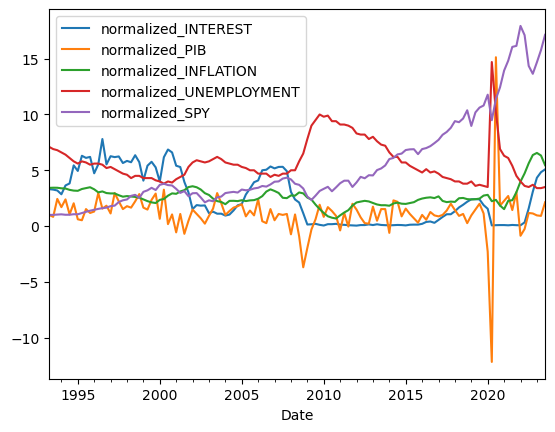

In [256]:
St.plot()

3. Calcular la correlación de las variables.

In [122]:

rt = df.pct_change().dropna()
CORRE =rt.corr()
CORRE

,INTEREST,PIB,INFLATION,UNEMPLOYMENT,SPY
INTEREST,1.000000,-0.033151,0.090395,-0.194163,-0.053910
PIB,-0.033151,1.000000,-0.290150,0.094900,0.176239
INFLATION,0.090395,-0.290150,1.000000,-0.183567,-0.060062
UNEMPLOYMENT,-0.194163,0.094900,-0.183567,1.000000,-0.329284
SPY,-0.053910,0.176239,-0.060062,-0.329284,1.000000


4. Crear el modelo de regesión multiple con sklearn.

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [225]:
X = df[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = df[['INTEREST']]


model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

0.5937755148369379

In [226]:
model.coef_[0]

array([ 0.02322396, -0.0126886 ,  0.90056274, -0.5589637 ])

$ Interest=  0.023* PIB -0.012 * SPY +0.9 * INFLATION  -0.558 *UNEMPLOY$

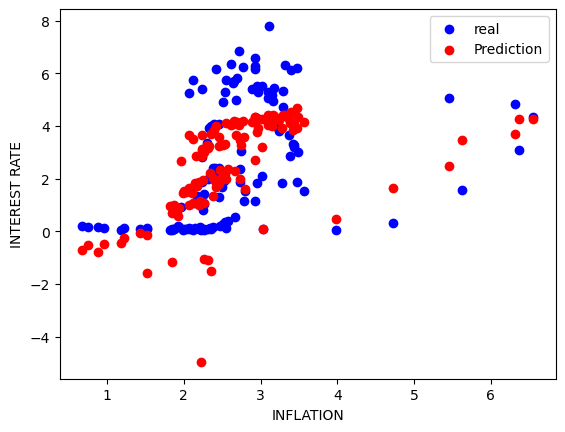

In [230]:
plt.scatter(df.INFLATION, y, c='blue', label='real')
plt.scatter(df.INFLATION, predictions, c='red', label='Prediction')
plt.xlabel('INFLATION')
plt.ylabel('INTEREST RATE')
plt.legend()

5. Correlación anual entre tasa e inflación con el paso del tiempo.

In [249]:
import numpy as np

def process_data_with_dates(df, model, batch_size=5):
    cov = []
    start_dates = []
    end_dates = []

    for i in range(0, len(df), batch_size):
        # Seleccionar el rango actual del DataFrame
        df_batch = df.iloc[i:i + batch_size].dropna()
        rt_batch = df_batch.pct_change()
        
        # Obtener las fechas de inicio y final del rango
        start_date = df_batch.index[0]
        end_date = df_batch.index[-1]

        # Covarianza
        c = rt_batch.corr()['INFLATION']['INTEREST']
        cov.append(c)
        
        start_dates.append(start_date)
        end_dates.append(end_date)

    return np.array(cov), np.array(start_dates), np.array(end_dates)

# Uso de la función con tu DataFrame 'rt' y tu modelo 'model'
cov_values, start_dates, end_dates = process_data_with_dates(rt, model)


In [250]:
corr = pd.DataFrame()
corr['CORR'] = cov_values
corr['Fecha inicio'] = start_dates
corr['Fecha final'] = end_dates

corr.dropna()

,CORR,Fecha inicio,Fecha final
0,0.689393,1993-07-01,1994-07-01
1,0.985249,1994-10-01,1995-10-01
2,-0.118141,1996-01-01,1997-01-01
3,-0.306545,1997-04-01,1998-04-01
4,0.587336,1998-07-01,1999-07-01
5,-0.596155,1999-10-01,2000-10-01
6,0.313209,2001-01-01,2002-01-01
7,0.949907,2002-04-01,2003-04-01
8,0.468805,2003-07-01,2004-07-01
9,0.157062,2004-10-01,2005-10-01


6. Calcular los coeficientes con datos del 1993 al 2021.

In [257]:
N = 113
df1 = df.iloc[:N]
df2 = df.iloc[N:]

X = df1[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = df1[['INTEREST']]


model = LinearRegression().fit(X, y)


In [235]:
model.coef_[0]

array([ 0.01889446, -0.01292642,  0.93456242, -0.55942107])

$ Interest= 0.018* PIB -0.012 * SPY +0.9345 * INFLATION - 0.559 *UNEMPLOY$

7. Evaluar datos del 2021 al 2023 en la furmula calculada y comprarar con los datos reales.

In [259]:
X = df2[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = df2[['INTEREST']]

predictions = model.predict(X)


8. Calcular R2 y graficar la predicción junto con los datos reales.

In [260]:
r2_score(y_pred=predictions, y_true=y)

0.5555807202859062

<Axes: xlabel='Date'>

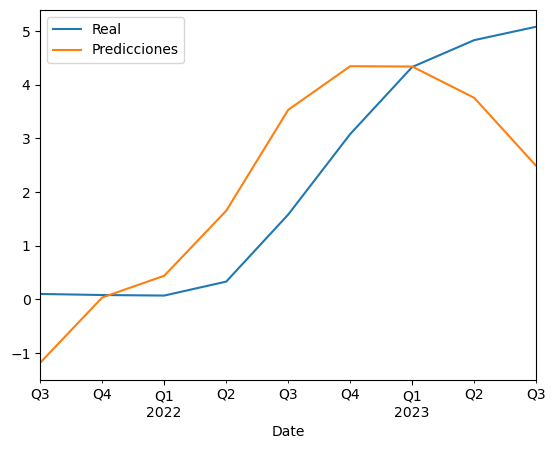

In [236]:
tabla = pd.DataFrame()
tabla['Real'] = y
tabla['Predicciones'] = predictions
#tabla['Inflación'] = df2.INFLATION 
tabla.plot()

9. Calcular beta anual con el paso del tiempo entre tasa e inflación. 

In [246]:

def process_data_with_dates(df, model, batch_size=15):
    beta = []
    r2 = []
    start_dates = []
    end_dates = []

    for i in range(0, len(df), batch_size):
        # Seleccionar el rango actual del DataFrame
        df_batch = df.iloc[i:i + batch_size]

        # Obtener las fechas de inicio y final del rango
        start_date = df_batch.index[0]
        end_date = df_batch.index[-1]

        # RT1
        X = df_batch[['INFLATION']] # VTI
        y = df_batch[['INTEREST']] # Accion
        
        model.fit(X, y)
        b = model.coef_[0][0]
        beta.append(b)

        predictions = model.predict(X)
        r = r2_score(y_pred=predictions, y_true=y)
        r2.append(r)


        start_dates.append(start_date)
        end_dates.append(end_date)

    return np.array(beta), np.array(r2), np.array(start_dates), np.array(end_dates)

# Uso de la función con tu DataFrame 'rt' y tu modelo 'model'
beta_values, r2_values, start_dates, end_dates = process_data_with_dates(rt, model)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [247]:
resultados = pd.DataFrame()
resultados['Betas'] = beta_values
#resultados['R2'] = r2_values
resultados['Fecha inicio'] = start_dates
resultados['Fecha final'] = end_dates
resultados.dropna()


,Betas,Fecha inicio,Fecha final
0,2.063232,1993-07-01,1997-01-01
1,-0.077643,1997-04-01,2000-10-01
2,-0.131313,2001-01-01,2004-07-01
3,-0.368639,2004-10-01,2008-04-01
4,-1.101921,2008-07-01,2012-01-01
5,1.877392,2012-04-01,2015-10-01
6,0.616689,2016-01-01,2019-07-01
7,1.506443,2019-10-01,2023-04-01
8,0.000000,2023-07-01,2023-07-01


10. Calcular coeficientes anuales con el paso del tiempo.

In [261]:

def process_data_with_dates(df, model, batch_size=15):
    pib = []
    vti = []
    inflation = []
    unemployment = []
    r2 = []
    start_dates = []
    end_dates = []

    for i in range(0, len(df), batch_size):
        # Seleccionar el rango actual del DataFrame
        df_batch = df.iloc[i:i + batch_size]

        # Obtener las fechas de inicio y final del rango
        start_date = df_batch.index[0]
        end_date = df_batch.index[-1]

        # RT1
        X = df_batch[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
        y = df_batch[['INTEREST']]
        
        model.fit(X, y)
        b0 = model.coef_[0][0]
        b1 = model.coef_[0][1]
        b2 = model.coef_[0][2]
        b3 = model.coef_[0][3]
        pib.append(b0) 
        vti.append(b1)
        inflation.append(b2)
        unemployment.append(b3)

        predictions = model.predict(X)
        r = r2_score(y_pred=predictions, y_true=y)
        r2.append(r)



        start_dates.append(start_date)
        end_dates.append(end_date)

    return np.array(pib), np.array(vti), np.array(inflation), np.array(unemployment), np.array(r2), np.array(start_dates), np.array(end_dates)

# Uso de la función con tu DataFrame 'rt' y tu modelo 'model'
pib_values, vti_values, inflation_values, unemployment_values, r2_values, start_dates, end_dates = process_data_with_dates(rt, model)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [262]:
resultados = pd.DataFrame()
resultados['R2'] = r2_values
resultados['INFLATION'] = inflation_values
resultados['PIB'] = pib_values
resultados['SPY'] = vti_values
resultados['UNEMPLOYMENT'] = unemployment_values
resultados['Fecha inicio'] = start_dates
resultados['Fecha final'] = end_dates
resultados.dropna()


,R2,INFLATION,PIB,SPY,UNEMPLOYMENT,Fecha inicio,Fecha final
0,0.127535,2.180475,0.023354,-0.519288,0.997698,1993-07-01,1997-01-01
1,0.289666,-0.685713,0.062842,-0.085686,2.096199,1997-04-01,2000-10-01
2,0.357342,0.210894,-0.024070,-0.631002,-2.431350,2001-01-01,2004-07-01
3,0.297275,-0.629410,-0.036841,1.050369,-3.598231,2004-10-01,2008-04-01
4,0.177665,-1.391017,-0.006233,0.942269,-1.506903,2008-07-01,2012-01-01
5,0.359275,5.355855,0.039808,6.463495,-2.837499,2012-04-01,2015-10-01
6,0.025183,0.625237,-0.040327,-0.531705,-0.553980,2016-01-01,2019-07-01
7,0.693108,-0.669607,-0.235453,-10.966603,-1.003245,2019-10-01,2023-04-01


11. Analisis de estilo con todos los datos.

In [151]:
# Importamos la librería optimize de scipy
from scipy.optimize import minimize

In [152]:
def model_fitt(X, y):
    def obj(coef, r_fondo, r_estilos):
        alpha = coef[0]
        w = coef[1:]
        modelo = alpha + r_estilos.dot(w)
        residuales = r_fondo - modelo
        return (residuales**2).mean()


    coef0 = [0, 0.25, 0.25, 0.25, 0.25]
    cons = {'type': 'eq', 'fun': lambda coef: coef[1:].sum() - 1}
    bnds = ((None, None),) + ((0, None),) * 4
    # Resolvemos
    style = minimize(
        fun=obj,
        x0=coef0,
        args=(y, X),
        bounds=bnds,
        constraints=cons,
        tol=1e-10
    )
    return style

In [161]:
# Datos
X = rt[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = rt['INTEREST']

model= model_fitt(X,y)

# Coeficientes alpha
model.x

array([1.07156543e-01, 7.15448971e-04, 2.29702108e-01, 7.69582443e-01,
       0.00000000e+00])

$ Tasa = 0.1071 * PIB + 0.0007 * SPY + 0.2297 * INFLATION + 0.7695 * UNEMPLOYMENT$

12. Analisis de estilo con el paso de los años.

In [221]:
# a
batch_size=30

df_batch = rt.iloc[0:0 + batch_size]

astart_date = df_batch.index[0]
aend_date = df_batch.index[-1]

X = df_batch[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = df_batch['INTEREST']

model= model_fitt(X,y)

# Coeficientes alpha
model.x

model_fitt(X, y)
a0 = model.x[1]
a1 = model.x[2]
a2 = model.x[3]
a3 = model.x[4]

# b

df_batch = rt.iloc[29:30 + batch_size]

bstart_date = df_batch.index[0]
bend_date = df_batch.index[-1]

X = df_batch[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = df_batch['INTEREST']

model= model_fitt(X,y)

# Coeficientes alpha
model.x

model_fitt(X, y)
b0 = model.x[1]
b1 = model.x[2]
b2 = model.x[3]
b3 = model.x[4]

# c

df_batch = rt.iloc[59:60 + batch_size]

cstart_date = df_batch.index[0]
cend_date = df_batch.index[-1]

X = df_batch[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = df_batch['INTEREST']

model= model_fitt(X,y)

# Coeficientes alpha
model.x

model_fitt(X, y)
c0 = model.x[1]
c1 = model.x[2]
c2 = model.x[3]
c3 = model.x[4]

# d

df_batch = rt.iloc[89:]

dstart_date = df_batch.index[0]
dend_date = df_batch.index[-1]

X = df_batch[['PIB', 'SPY','INFLATION','UNEMPLOYMENT']]
y = df_batch['INTEREST']

model= model_fitt(X,y)

# Coeficientes alpha
model.x

model_fitt(X, y)
d0 = model.x[1]
d1 = model.x[2]
d2 = model.x[3]
d3 = model.x[4]


In [222]:
results = pd.DataFrame()
#results['R2'] = r2_values
results['INFLATION'] = [a2,b2,c2,d2]
results['PIB'] = [a0,b0,c0,d0]
results['SPY'] = [a1,b1,c1,d1]
results['UNEMPLOYMENT'] = [a3,b3,c3,d3]
results['Fecha inicio'] = [astart_date,bstart_date,cstart_date,dstart_date]
results['Fecha final'] = [aend_date,bend_date,cend_date,dend_date]
results.dropna()

,INFLATION,PIB,SPY,UNEMPLOYMENT,Fecha inicio,Fecha final
0,0.000000,4.119595e-02,9.259087e-17,9.588040e-01,1993-07-01,2000-10-01
1,0.556095,6.827086e-19,4.439047e-01,1.139090e-16,2000-10-01,2008-04-01
2,0.000000,1.695261e-03,9.983047e-01,0.000000e+00,2008-04-01,2015-10-01
3,1.000000,1.734723e-18,0.000000e+00,1.040834e-16,2015-10-01,2023-07-01
